In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()
import matplotlib.pyplot as plt
# %matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

# dss_team_project

## [House Price: Adcanced Regressin Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
+ team lucky
  + 권순호, 지성민, 김동현

+ Goal
	* it is your job to predict the sales price for each house.
	* For each Id in test set, you must predict the value of the SalePrice variable.

+ Metric
	* submissions are evaluated in Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.(Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally)

+ porject index
	* ~ 10/10 EDA(Exploratory data analysis)
	* ~ 10/14 Feature selection
	* ~ 10/16 Modeling(OLS Regression)
	* ~ 10/21 Model selection
	* ~ 10/25 Project 발표


### EDA 
+ 변수 탐색 및 분류
  + 변수가 무엇을 의미하는지 파악
  + 상관관계가 없는 변수는 어떤것이 있나?
  + 판매가격과 상관관계가 없는 변수는 어떻게 처리할 것인가?  #오탈자 수정
  + 의미없는값, 전처리가 필요한 값들을 선별및 가공하자


+ EDA 담당 Column
  + 김동현 : 01. MSSubClass ~ 28. Foundation (28개)   
  + 지성민 : 29. BsmtQual ~ 54. Functional (26개)  
  + 권순호 : 55. Fireplaces ~ 78. SalesCondition (24개)  
  

## data describe & target describe

In [2]:
df = pd.read_csv('./data/train.csv')
df = df.set_index("Id")

dfy = pd.DataFrame(df, columns=['SalePrice'])
dfX = df.drop('SalePrice', axis=1)

df = pd.concat([dfX, dfy], axis=1)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

df.tail()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1451          90       RL         60.0     9000   Pave   NaN      Reg   
1452          20       RL         78.0     9262   Pave   NaN      Reg   
1454          20       RL         90.0    17217   Pave   NaN      Reg   
1455          20       FV         62.0     7500   Pave  Pave      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
1451         Lvl    AllPub       FR2       Gtl        NAmes       Norm   
1452         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1454         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1455         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1459         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                         
1451       Norm   Duplex     2Story            5            5       1974   
1452       Norm     1Fam     1Story            8            5       2008   
1454       Norm     1Fam     1Story            5            5       2006   
1455       Norm     1Fam     1Story            7            5       2004   
1459       Norm     1Fam     1Story            5            6       1950   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                         
1451          1974     Gable  CompShg     VinylSd     VinylSd       None   
1452          2009     Gable  CompShg     CemntBd     CmentBd      Stone   
1454          2006     Gable  CompShg     VinylSd     VinylSd       None   
1455          2005     Gable  CompShg     VinylSd     VinylSd       None   
1459          1996       Hip  CompShg     MetalSd     MetalSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                                                  
1451         0.0        TA        TA     CBlock       Gd       TA   
1452       194.0        Gd        TA      PConc       Gd       TA   
1454         0.0        TA        TA      PConc       Gd       TA   
1455         0.0        Gd        TA      PConc       Gd       TA   
1459         0.0        TA        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
Id                                                                    
1451           No          Unf           0          Unf           0   
1452           No          Unf           0          Unf           0   
1454           No          Unf           0          Unf           0   
1455           No          GLQ         410          Unf           0   
1459           Mn          GLQ          49          Rec        1029   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
Id                                                                     
1451        896          896    GasA        TA          Y      SBrkr   
1452       1573         1573    GasA        Ex          Y      SBrkr   
1454       1140         1140    GasA        Ex          Y      SBrkr   
1455        811         1221    GasA        Ex          Y      SBrkr   
1459          0         1078    GasA        Gd          Y      FuseA   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                              
1451       896       896             0       1792             0             0   
1452      1578         0             0       1578             0             0   
1454      1140         0             0       1140             0             0   
1455      1221   

In [3]:
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1030.000000   852.000000    1030.000000  1030.000000  1030.000000   
mean     55.543689    70.264085   10739.995146     6.113592     5.553398   
std      41.742833    24.006403   11381.288115     1.368715     1.088219   
min      20.000000    21.000000    1491.000000     1.000000     1.000000   
25%      20.000000    59.000000    7590.000000     5.000000     5.000000   
50%      50.000000    70.000000    9512.500000     6.000000     5.000000   
75%      60.000000    80.000000   11638.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1030.000000   1030.000000  1026.000000  1030.000000  1030.000000   
mean   1972.049515   1984.533010   106.712476   447.696117    46.509709   
std      29.625332     20.740199   182.215365   467.521505   161.217951   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1966.250000     0.000000     0.000000     0.000000   
50%    1974.000000   1993.000000     0.000000   384.000000     0.000000   
75%    2001.000000   2004.000000   170.750000   704.750000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    572.577670  1066.783495  1163.185437   348.624272      7.214563   
std     438.785772   447.501650   393.614453   433.443217     55.592293   
min       0.000000     0.000000   372.000000     0.000000      0.000000   
25%     230.000000   804.000000   882.000000     0.000000      0.000000   
50%     483.500000   992.000000  1088.500000     0.000000      0.000000   
75%     809.500000  1294.750000  1389.750000   737.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  1872.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath    HalfBath  \
count  1030.000000   1030.000000   1030.000000  1030.000000  1030.00000   
mean   1519.024272      0.411650      0.060194     1.566990     0.38835   
std     523.062751      0.513624      0.245994     0.542533     0.50523   
min     438.000000      0.000000      0.000000     0.000000     0.00000   
25%    1131.000000      0.000000      0.000000     1.000000     0.00000   
50%    1479.000000      0.000000      0.000000     2.000000     0.00000   
75%    1789.500000      1.000000      0.000000     2.000000     1.00000   
max    5642.000000      3.000000      2.000000     3.000000     2.00000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1030.000000   1030.000000   1030.000000  1030.000000   973.000000   
mean       2.865049      1.036893      6.520388     0.612621  1978.606372   
std        0.808267      0.203464      1.623764     0.630020    24.648731   
min        0.000000      0.000000      3.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1962.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1030.000000  1030.000000  1030.000000  1030.000000     1030.00000   
mean      1.774757   473.315534    95.205825    46.602913       20.44466   
std       0.742794   211.744787   124.859370    66.664052       59.19463   
min       0.000000     0.000000     0.000000     0.000000        0.00000   
25%       1.000000   338.000000     0.000000     0.000000        0.00000   
50%       2.000000   478.500000     0.000000    24.000000        0.00000   
75%       2.000000   576.000000   170.250000    67.750000        0.00

In [4]:
dfX['LotFrontage'].describe()

count    852.000000
mean      70.264085
std       24.006403
min       21.000000
25%       59.000000
50%       70.000000
75%       80.000000
max      313.000000
Name: LotFrontage, dtype: float64

In [5]:
dfX['LotFrontage'] = dfX['LotFrontage'].fillna(dfX['LotFrontage'].median())
dfX['LotFrontage'].describe()

count    1030.000000
mean       70.218447
std        21.831759
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [6]:
dfX['MasVnrArea'].describe()

count    1026.000000
mean      106.712476
std       182.215365
min         0.000000
25%         0.000000
50%         0.000000
75%       170.750000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [7]:
# 0으로 둘지 평균으로둘지 고민해봐야함
dfX['MasVnrArea'] = dfX['MasVnrArea'].fillna(dfX['MasVnrArea'].median())
dfX['MasVnrArea'].describe()

count    1030.000000
mean      106.298058
std       181.982051
min         0.000000
25%         0.000000
50%         0.000000
75%       170.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [8]:
df['SalePrice'].describe()

count      1030.000000
mean     181529.582524
std       78070.440130
min       34900.000000
25%      129925.000000
50%      165000.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

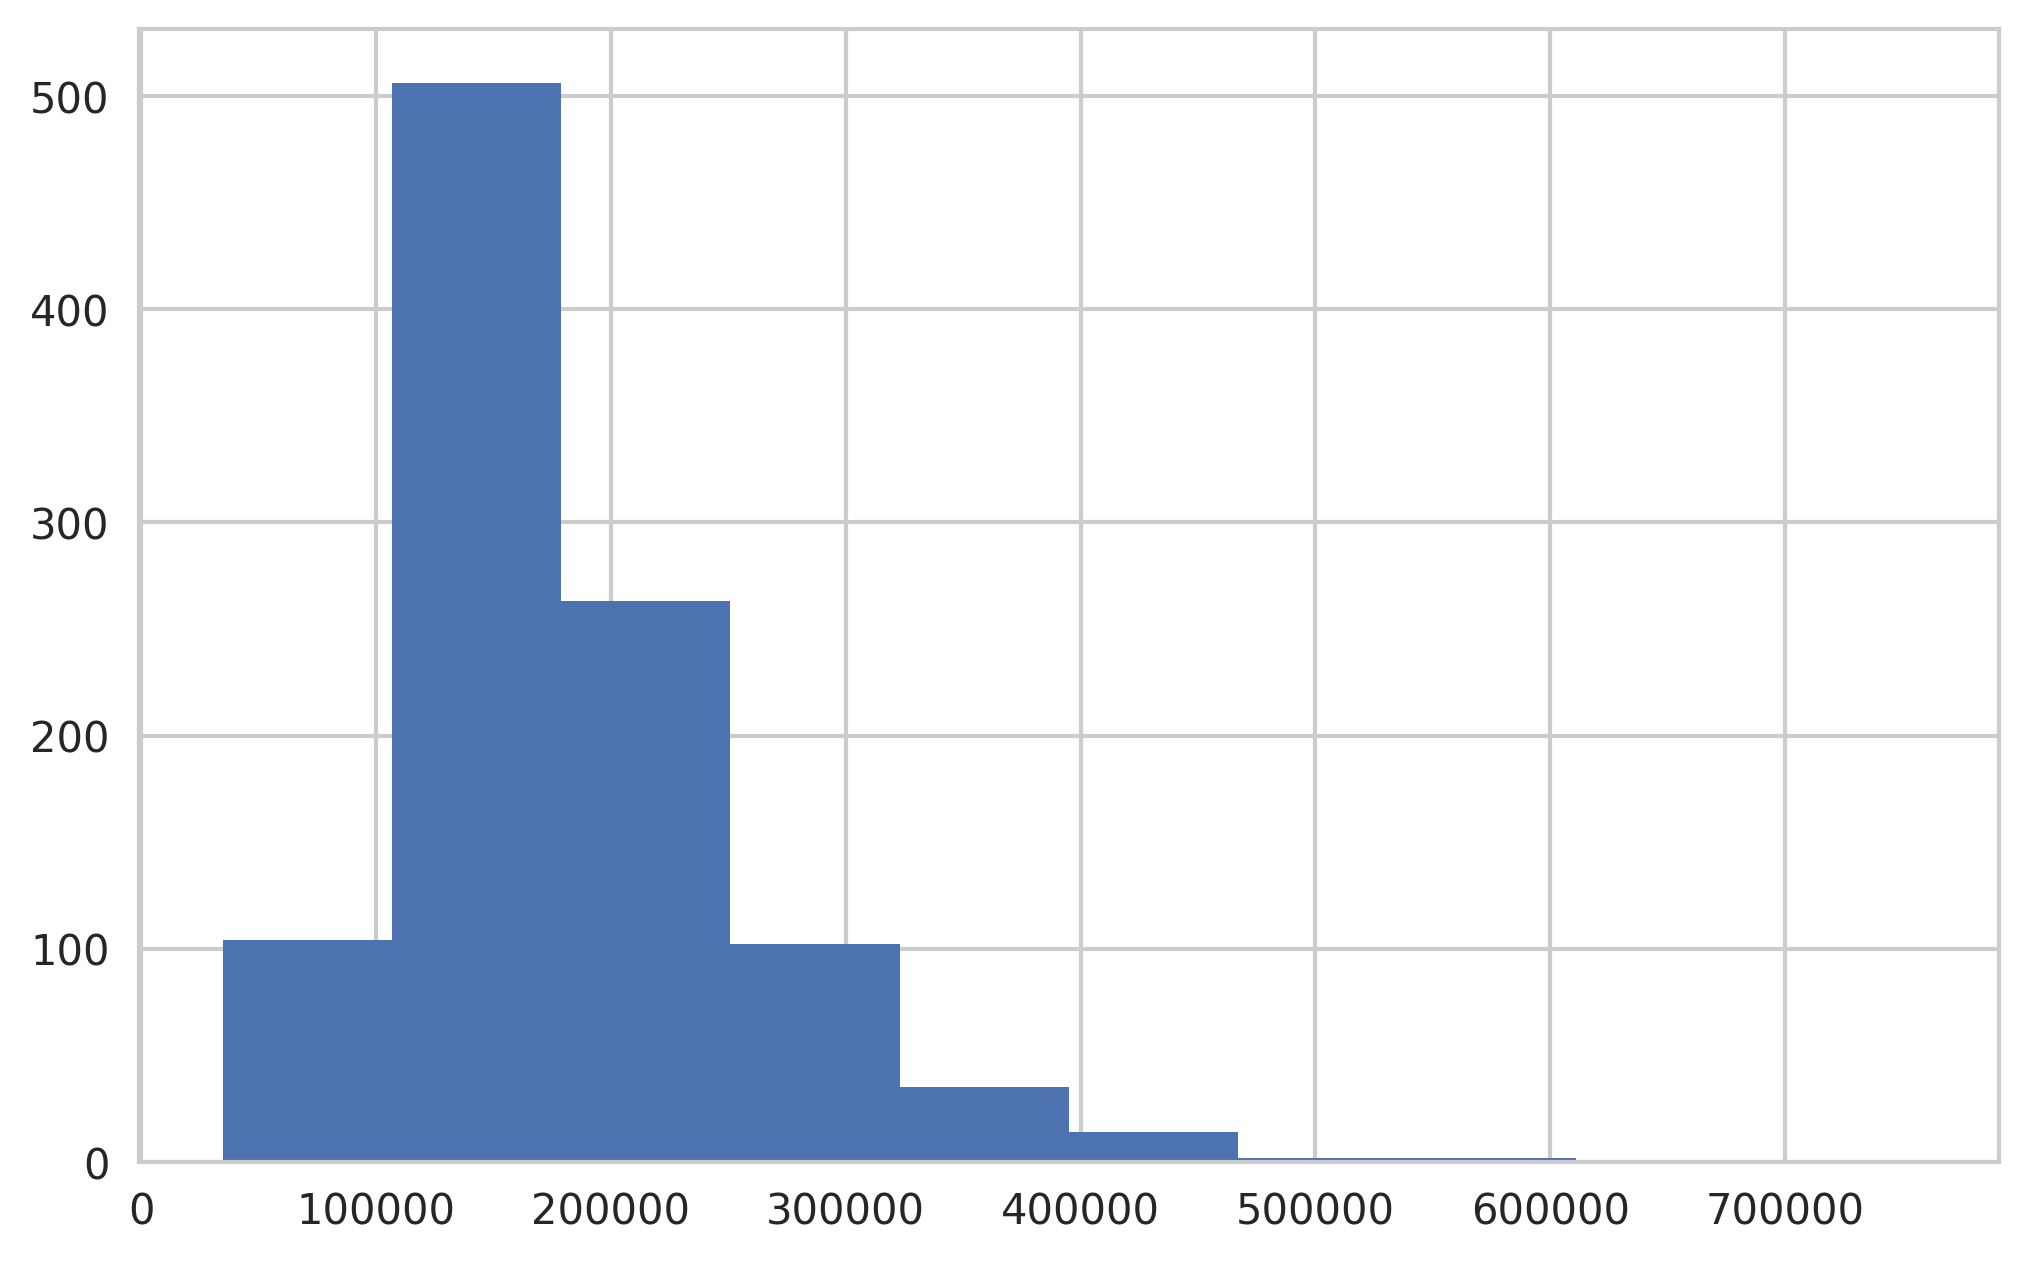

In [52]:
# 왜도가 높게 나옴
plt.hist(df.SalePrice)
plt.show()

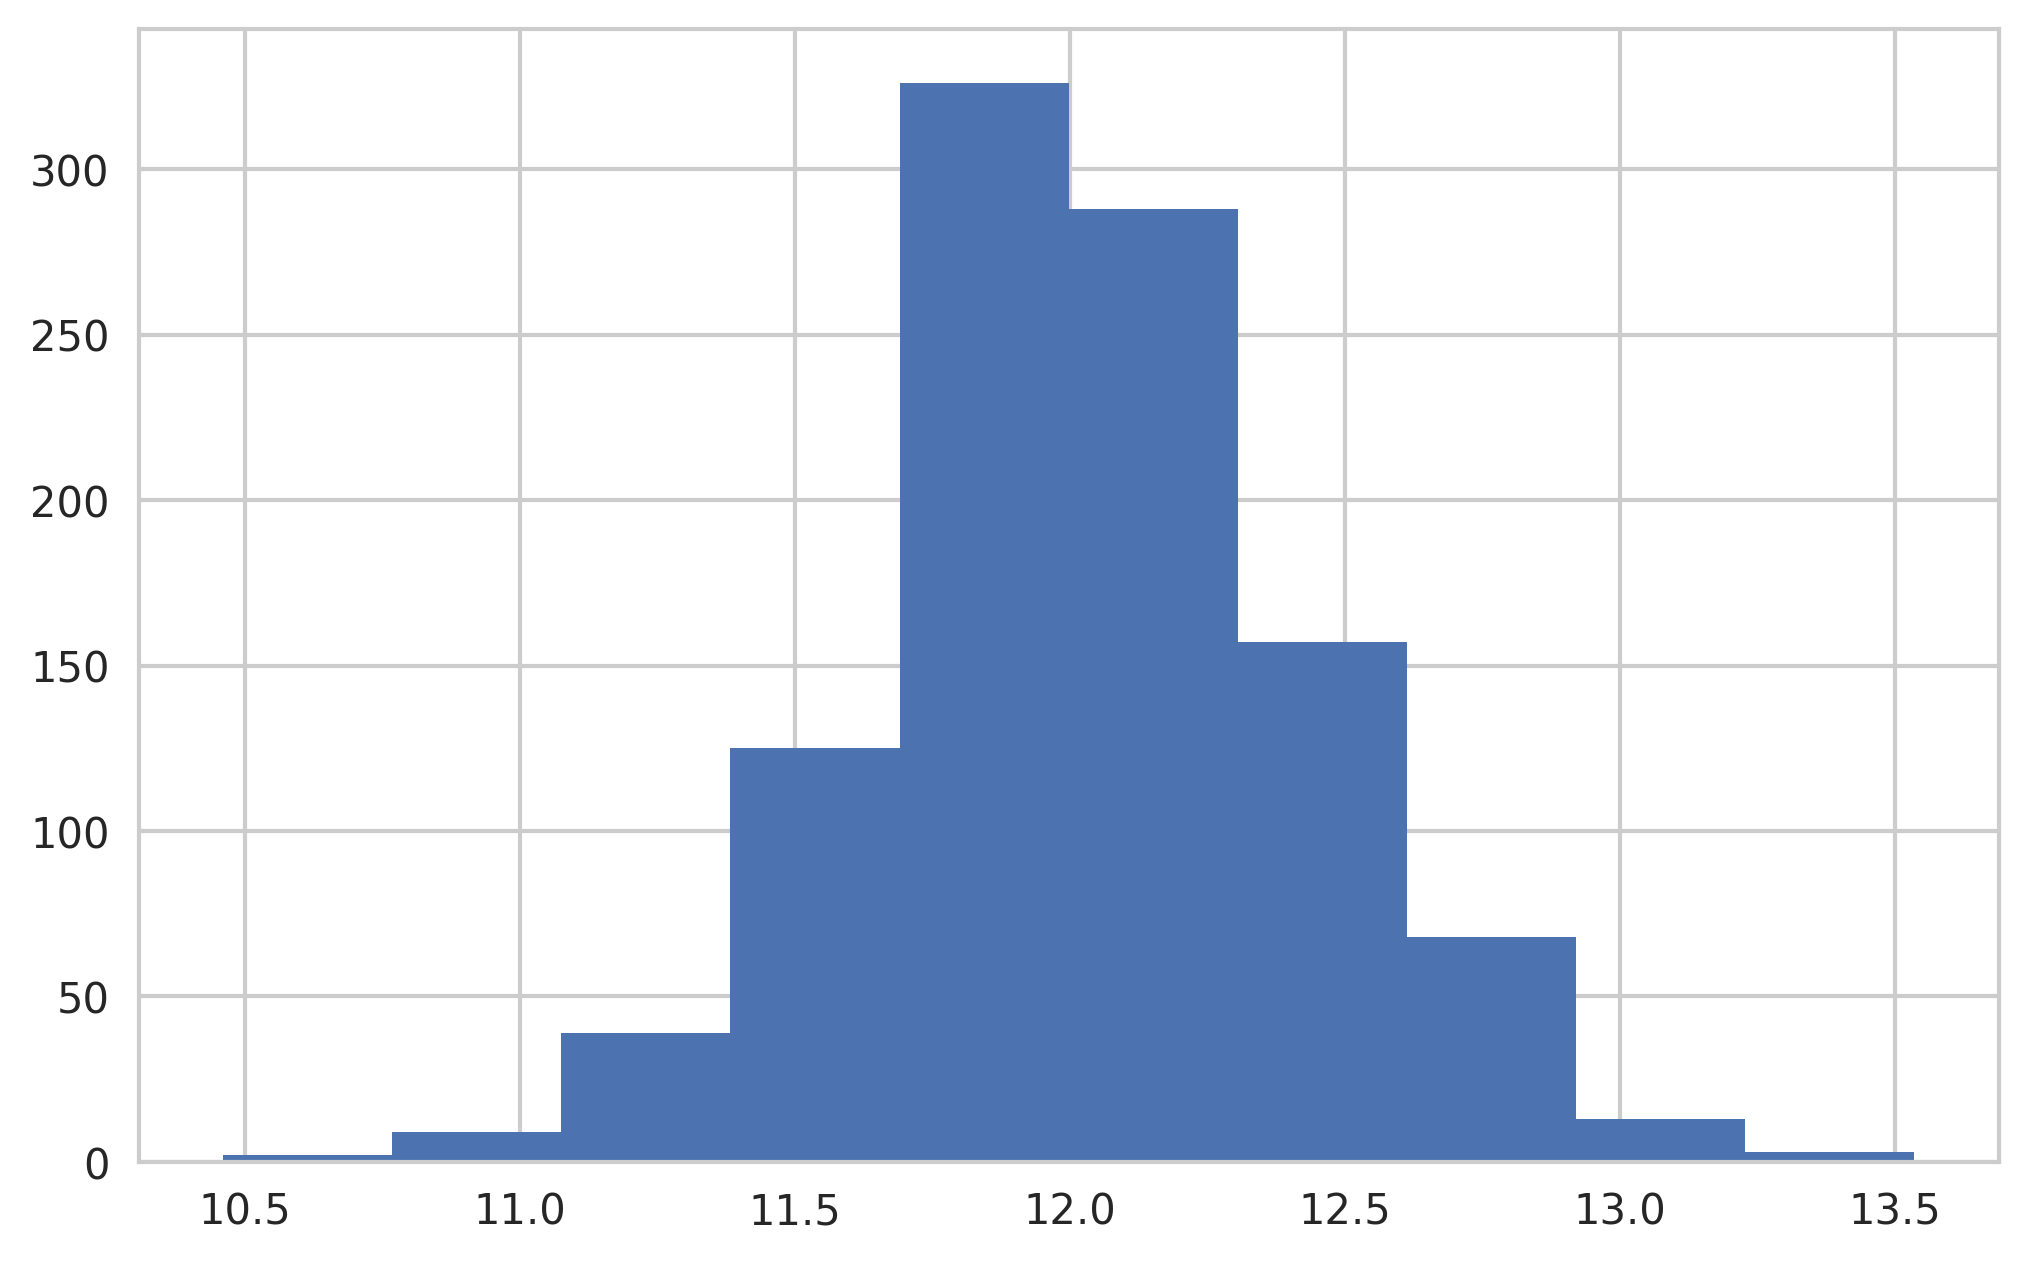

In [53]:
#왜도를 낮춤
log_SalePrice = np.log(df['SalePrice'])
plt.hist(log_SalePrice)
plt.show()

In [11]:
# dfy = pd.DataFrame(log_SalePrice, columns=['SalePrice'])
# df = pd.concat([dfX, dfy], axis=1)

In [12]:
# 비어있는칸의 갯수 확인
df = pd.concat([dfX, dfy], axis=1)
null_count = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
null_count.head(20)

0
PoolQC        1026
MiscFeature    997
Alley          971
Fence          834
FireplaceQu    477
GarageQual      57
GarageCond      57
GarageFinish    57
GarageType      57
GarageYrBlt     57
BsmtFinType2    23
BsmtQual        22
BsmtCond        22
BsmtExposure    22
BsmtFinType1    22
MasVnrType       4
Electrical       1
RoofStyle        0
RoofMatl         0
ExterQual        0

## 양적 변수와 카테고리 변수 분류

In [13]:
# 양적 변수
cols_real = ['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
             'LowQualFinSF', 'GrLivArea', "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", 
             "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", 'SalePrice']

# 카테고리 변수
cols_cat = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
            'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd', 
            'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
            'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','KitchenQual', 
            'TotRmsAbvGrd', 'Functional', "Fireplaces", "FireplaceQu", "GarageCars", "GarageType", "GarageYrBlt", "GarageFinish", 
            "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature", "MoSold", "YrSold", "SaleType", "SaleCondition"]

print(len(cols_real))
print(len(cols_cat))

20
60


In [14]:
df_real= df.loc[:, cols_real]

df_real.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
Id                                                                        
1          65.0     8450       196.0         706           0        150   
2          80.0     9600         0.0         978           0        284   
3          68.0    11250       162.0         486           0        434   
4          60.0     9550         0.0         216           0        540   
5          84.0    14260       350.0         655           0        490   

    TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
Id                                                                         
1           856       856       854             0       1710         548   
2          1262      1262         0             0       1262         460   
3           920       920       866             0       1786         608   
4           756       961       756             0       1717         642   
5          1145      1145      1053             0       2198         836   

    WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
Id                                                                             
1            0           61              0          0            0         0   
2          298            0              0          0            0         0   
3            0           42              0          0            0         0   
4            0           35            272          0            0         0   
5          192           84              0          0            0         0   

    MiscVal  SalePrice  
Id                      
1         0     208500  
2         0     181500  
3         0     223500  
4         0     140000  
5         0     250000

In [15]:
df_cat= df.loc[:, cols_cat]

df_cat.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
Id                                                                              
1           60       RL   Pave   NaN      Reg         Lvl    AllPub    Inside   
2           20       RL   Pave   NaN      Reg         Lvl    AllPub       FR2   
3           60       RL   Pave   NaN      IR1         Lvl    AllPub    Inside   
4           70       RL   Pave   NaN      IR1         Lvl    AllPub    Corner   
5           60       RL   Pave   NaN      IR1         Lvl    AllPub       FR2   

   LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
Id                                                                    
1        Gtl      CollgCr       Norm       Norm     1Fam     2Story   
2        Gtl      Veenker      Feedr       Norm     1Fam     1Story   
3        Gtl      CollgCr       Norm       Norm     1Fam     2Story   
4        Gtl      Crawfor       Norm       Norm     1Fam     2Story   
5        Gtl      NoRidge       Norm       Norm     1Fam     2Story   

    OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
Id                                                                         
1             7            5       2003          2003     Gable  CompShg   
2             6            8       1976          1976     Gable  CompShg   
3             7            5       2001          2002     Gable  CompShg   
4             7            5       1915          1970     Gable  CompShg   
5             8            5       2000          2000     Gable  CompShg   

   Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
Id                                                                              
1      VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
2      MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
3      VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
4      Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
5      VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

   BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
Id                                                                     
1        TA           No          GLQ          Unf    GasA        Ex   
2        TA           Gd          ALQ          Unf    GasA        Ex   
3        TA           Mn          GLQ          Unf    GasA        Ex   
4        Gd           No          ALQ          Unf    GasA        Gd   
5        TA           Av          GLQ          Unf    GasA        Ex   

   CentralAir Electrical  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
Id                                                                         
1           Y      SBrkr             1             0         2         1   
2           Y      SBrkr             0             1         2         0   
3           Y      SBrkr             1             0         2         1   
4           Y      SBrkr             1             0         1         0   
5           Y      SBrkr             1             0         2         1   

    BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
Id                                                                    
1              3             1          Gd             8        Typ   
2              3             1          TA             6        Typ   
3              3             1          Gd             6        Typ   
4              3             1          Gd             7        Typ   
5              4             1          Gd             9        Typ   

    Fireplaces FireplaceQu  GarageCars GarageType  GarageYrBlt GarageFinish  \
Id                                                                            
1            0         NaN           2     Attchd       2003.0          RFn   
2            1          TA           2     Attchd       1976.0  

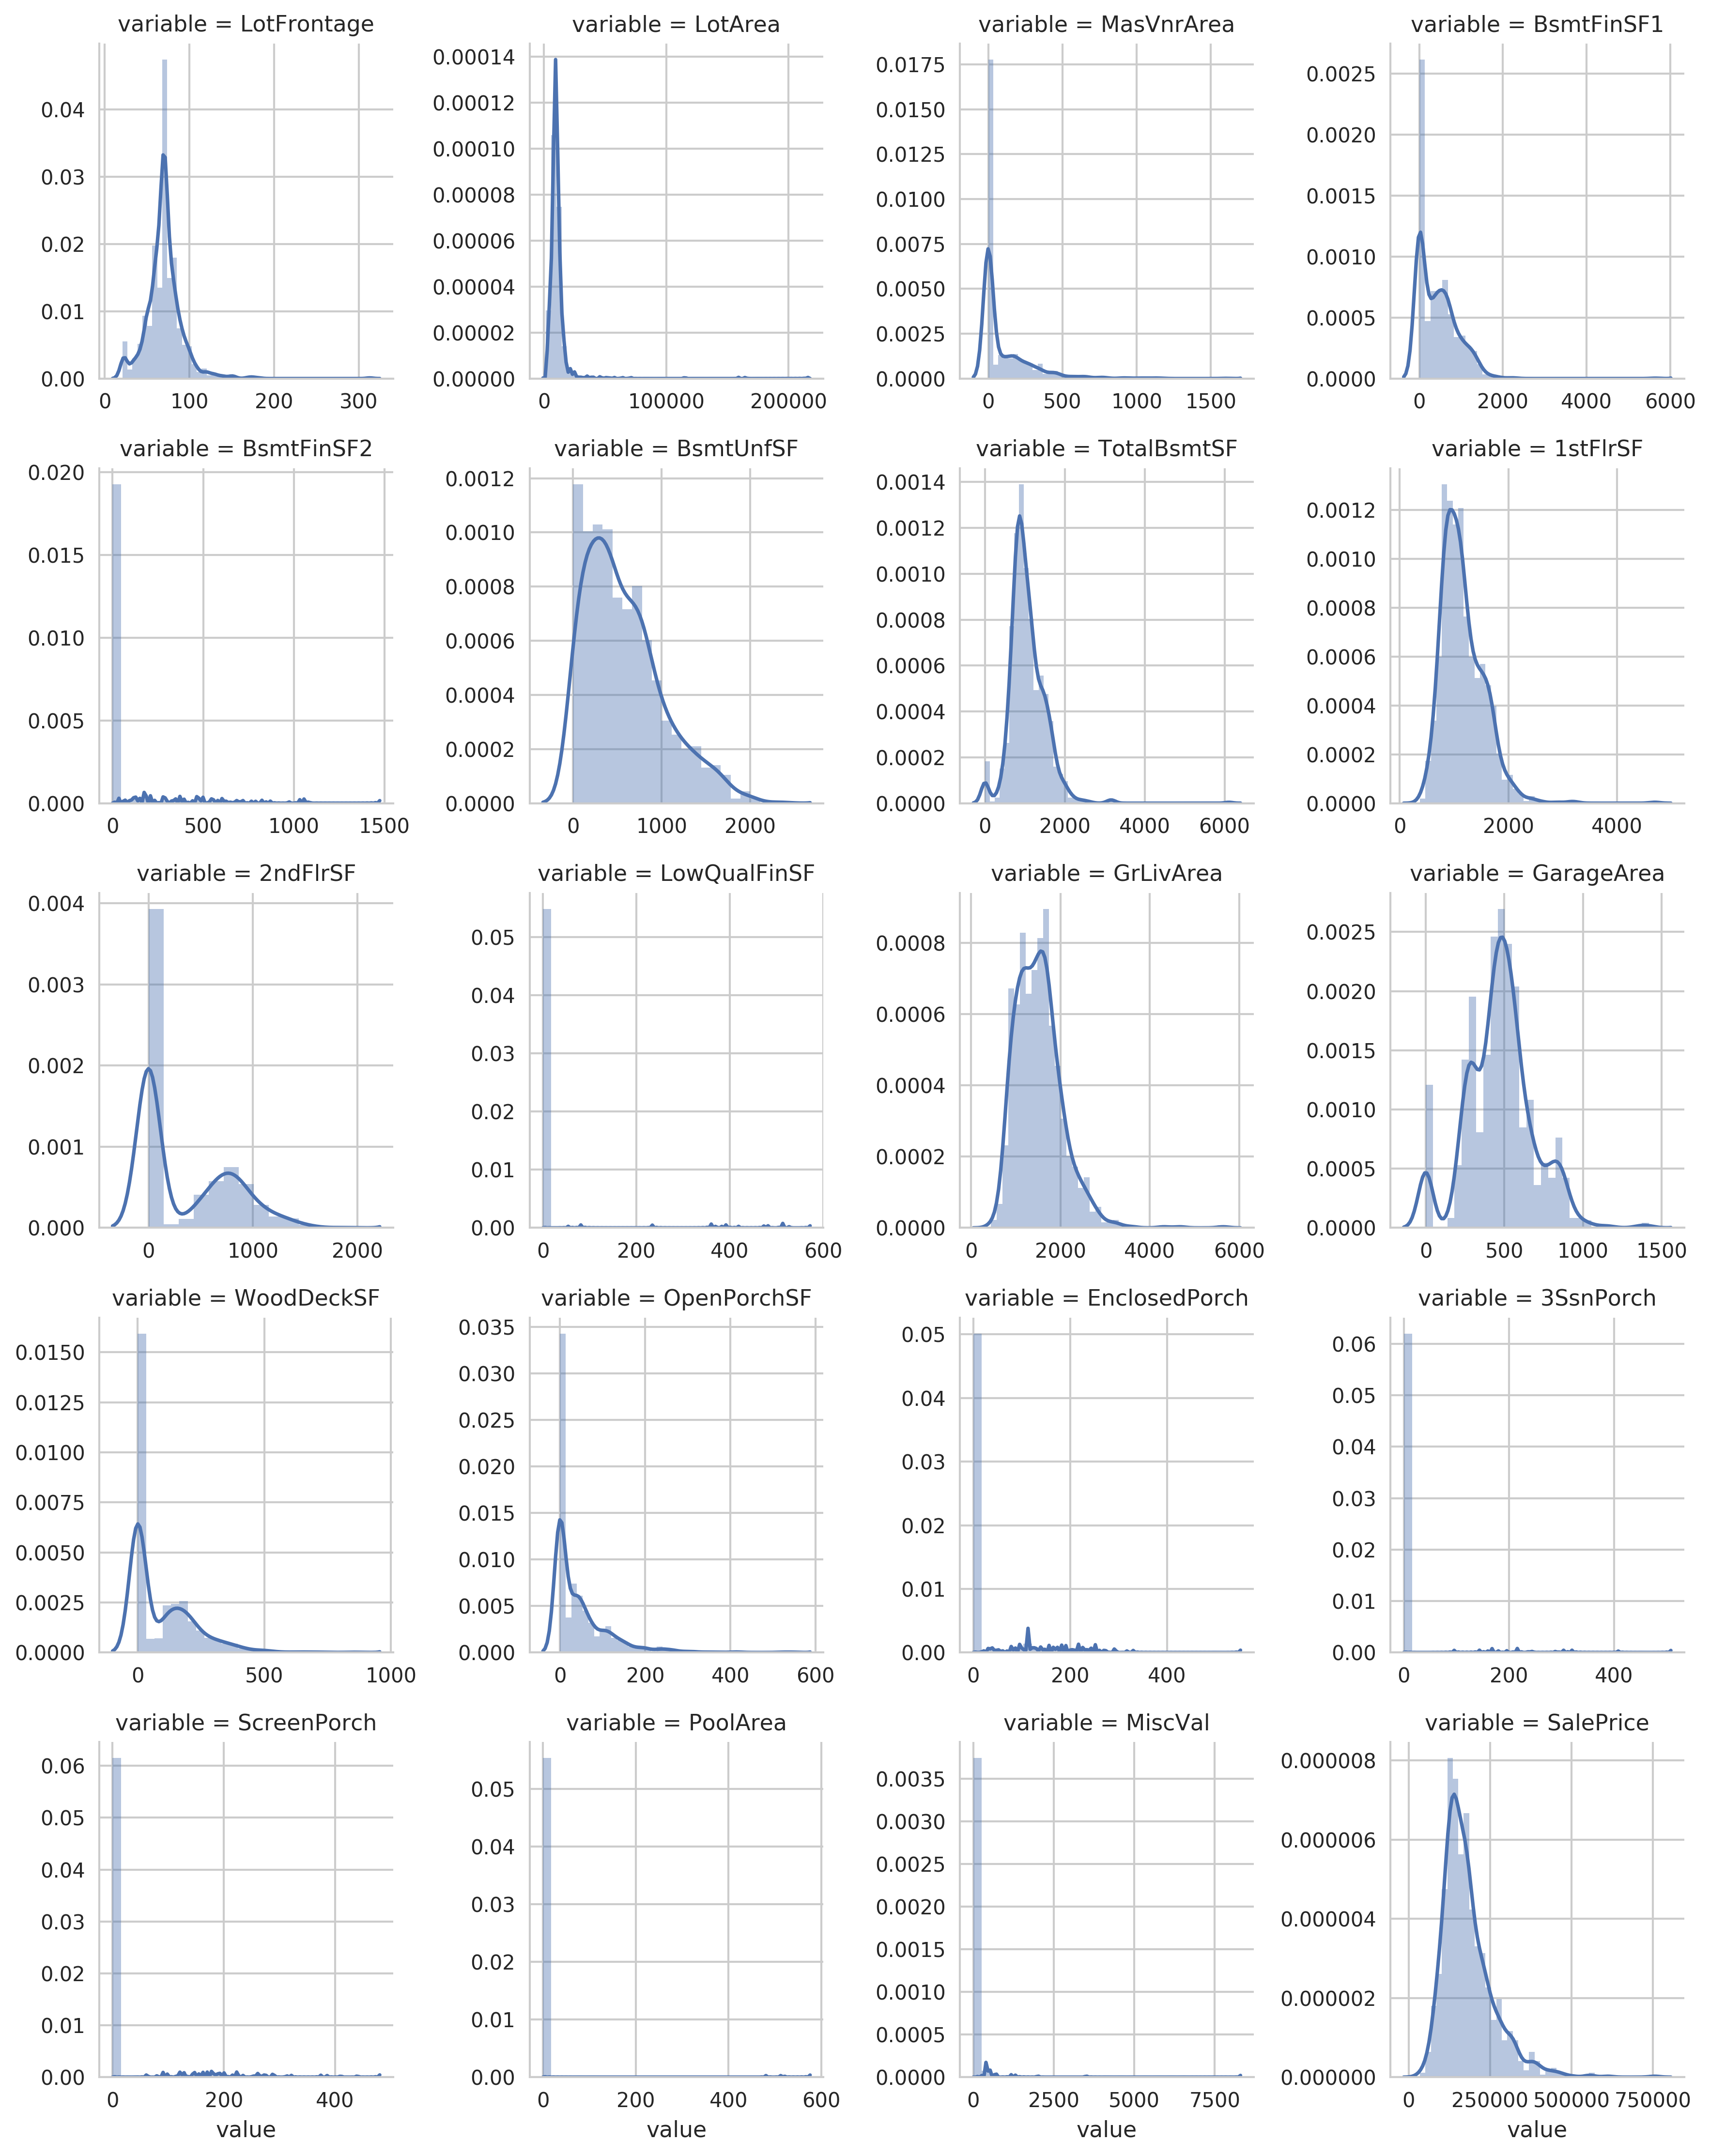

In [16]:
# 분포를 그래프로 시각화
f = pd.melt(df, value_vars=cols_real)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

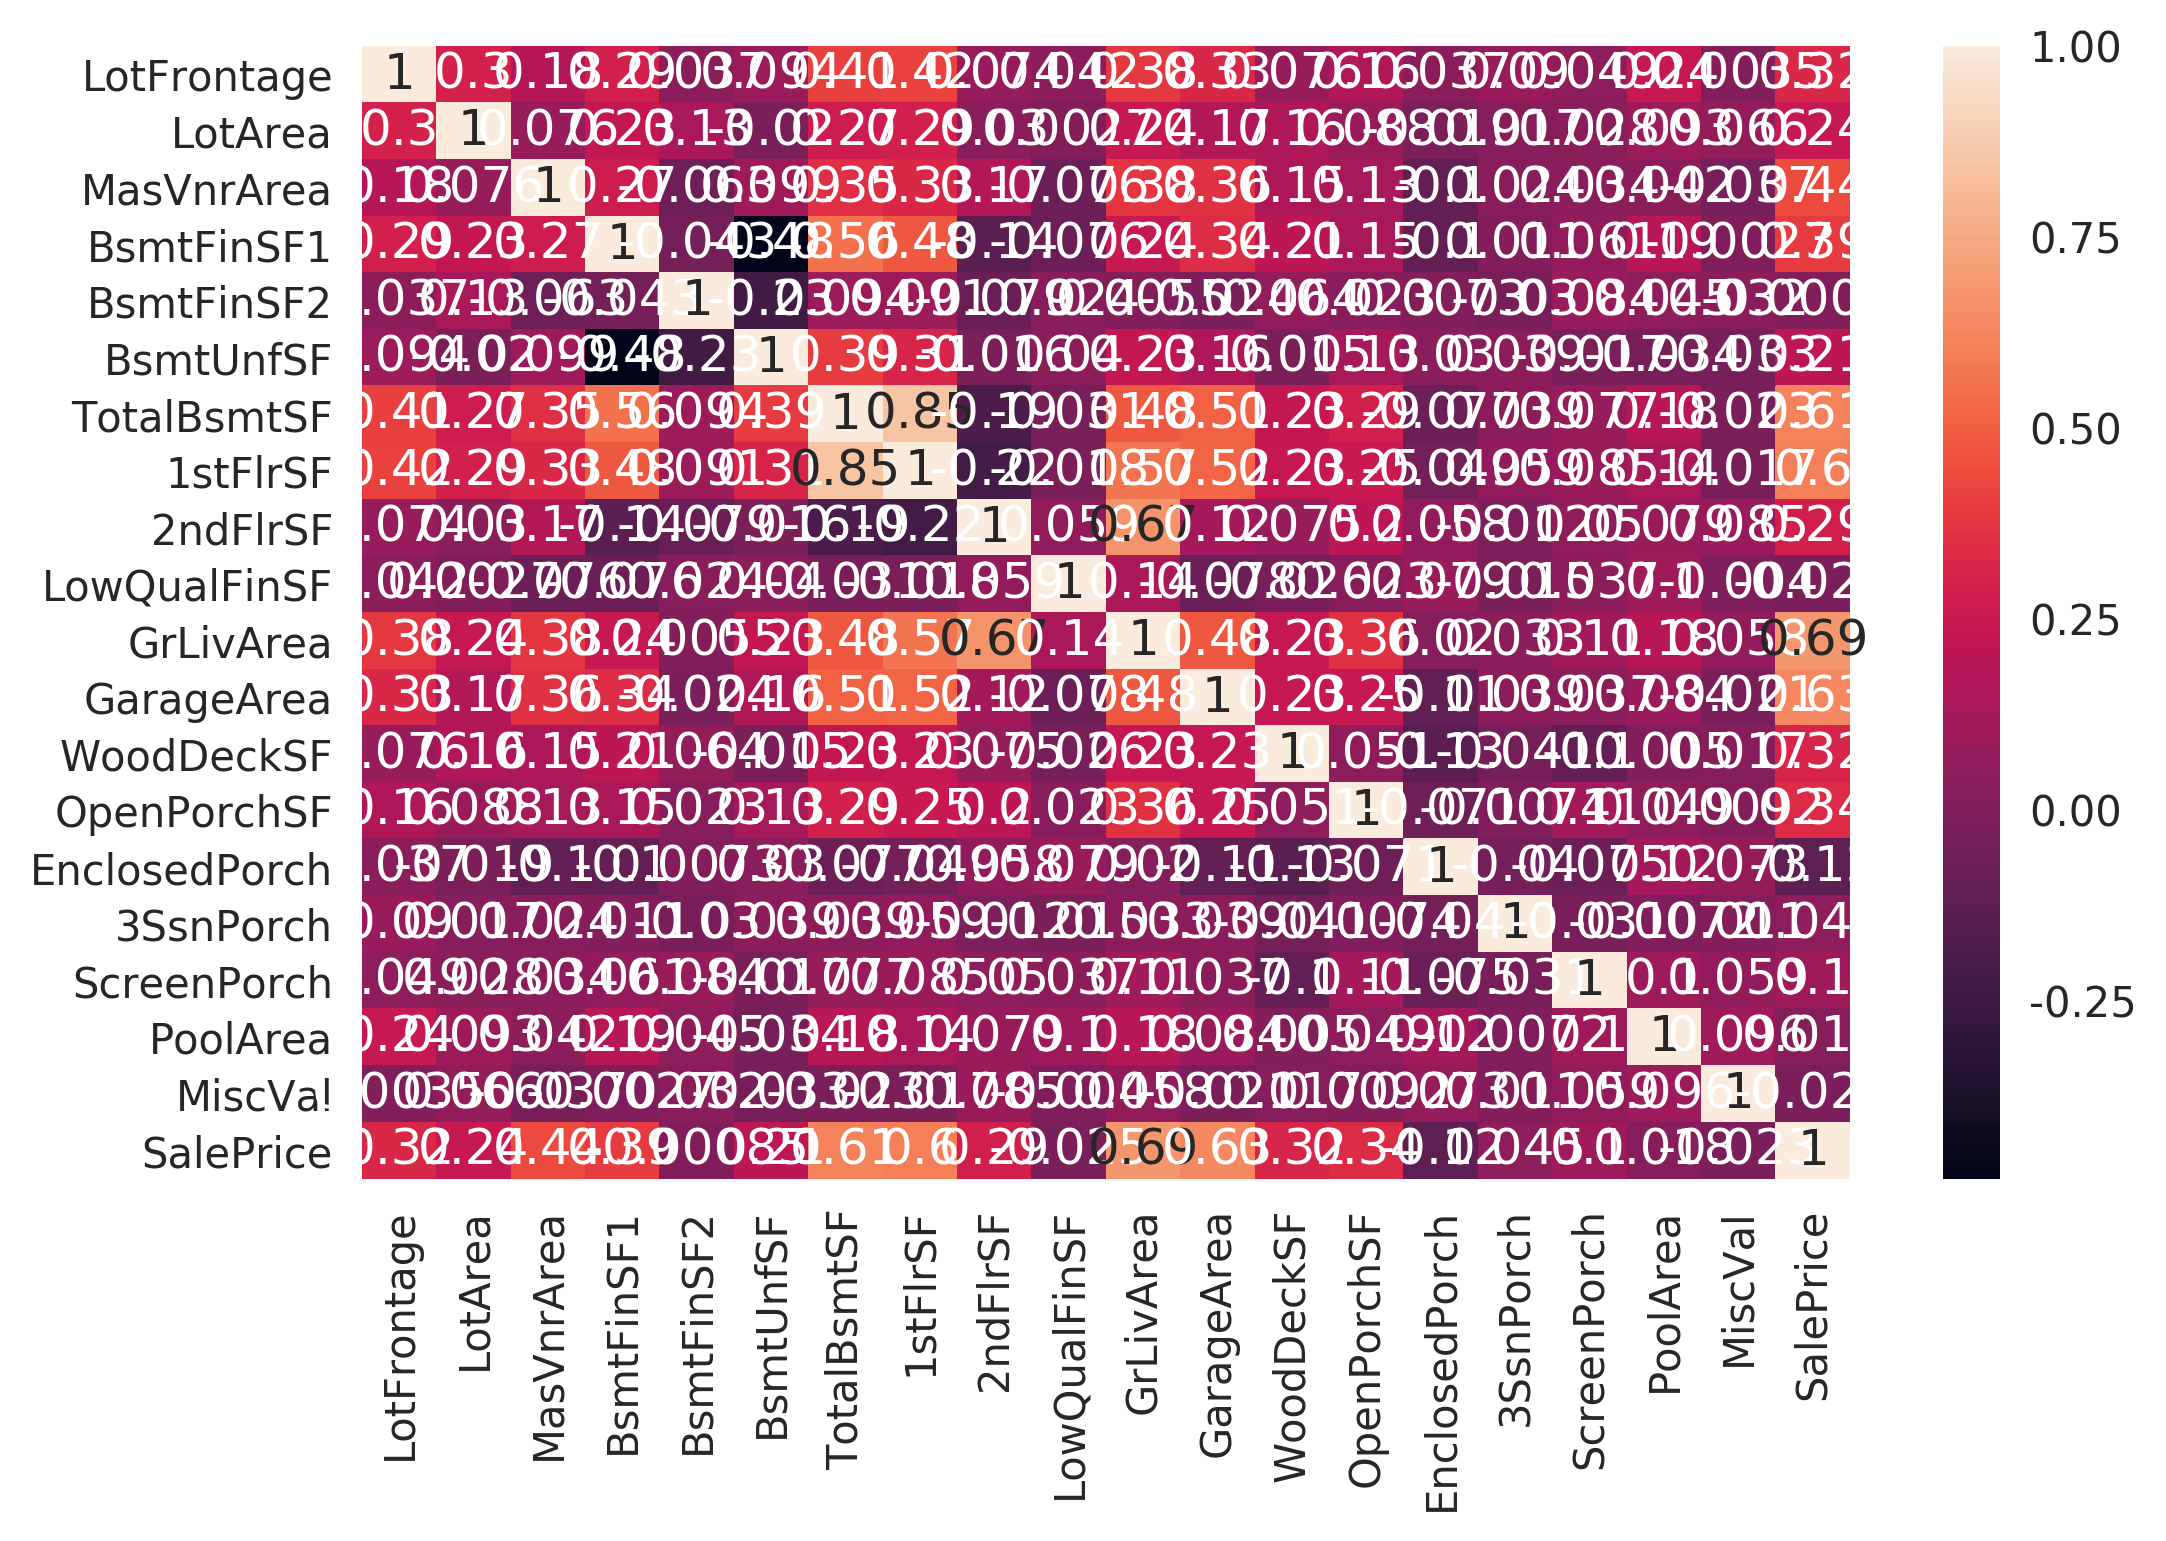

In [17]:
corr_real = df_real.corr()
draw = sns.heatmap(corr_real, annot = True)
plt.show(draw)

In [18]:
# SalePrice 와의 상관계수만 따로 모음
corr_real.SalePrice

LotFrontage      0.324623
LotArea          0.244547
MasVnrArea       0.443575
BsmtFinSF1       0.393596
BsmtFinSF2      -0.000854
BsmtUnfSF        0.206161
TotalBsmtSF      0.613042
1stFlrSF         0.602311
2ndFlrSF         0.285219
LowQualFinSF    -0.024921
GrLivArea        0.686952
GarageArea       0.634201
WoodDeckSF       0.315122
OpenPorchSF      0.338569
EnclosedPorch   -0.119878
3SsnPorch        0.045000
ScreenPorch      0.099935
PoolArea         0.017794
MiscVal         -0.022613
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [19]:
aa = df_real.drop('SalePrice',axis = 1)
dfX1 = sm.add_constant(aa)

model = sm.OLS(dfy, dfX1, missing = 'drop')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     126.8
Date:                Thu, 19 Oct 2017   Prob (F-statistic):          1.50e-236
Time:                        18:53:01   Log-Likelihood:                -12477.
No. Observations:                1030   AIC:                         2.499e+04
Df Residuals:                    1012   BIC:                         2.508e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3193.1299   5928.626     -0.539

In [20]:
aa = df_real.drop('SalePrice',axis = 1)
model = sm.OLS(dfy, aa, missing = 'drop')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     1136.
Date:                Thu, 19 Oct 2017   Prob (F-statistic):               0.00
Time:                        18:53:01   Log-Likelihood:                -12477.
No. Observations:                1030   AIC:                         2.499e+04
Df Residuals:                    1013   BIC:                         2.507e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
LotFrontage     -96.6705     65.395     -1.478

In [21]:
# 필터 0.4 이상 -0.4 이하인것
corr_real_fillter = (corr_real.SalePrice > 0.4) | (corr_real.SalePrice < -0.4)
# 상관계수가 0.4이상 -0.4 이하인 변수들
corr_real_use_var = corr_real.loc[corr_real_fillter, corr_real_fillter]

# 사용할 변수 리스트
cols_real_use = list(corr_real_use_var.keys())
# cols_real_use.remove('SalePrice')
# cols_real_use
cols_real_use

['MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageArea',
 'SalePrice']

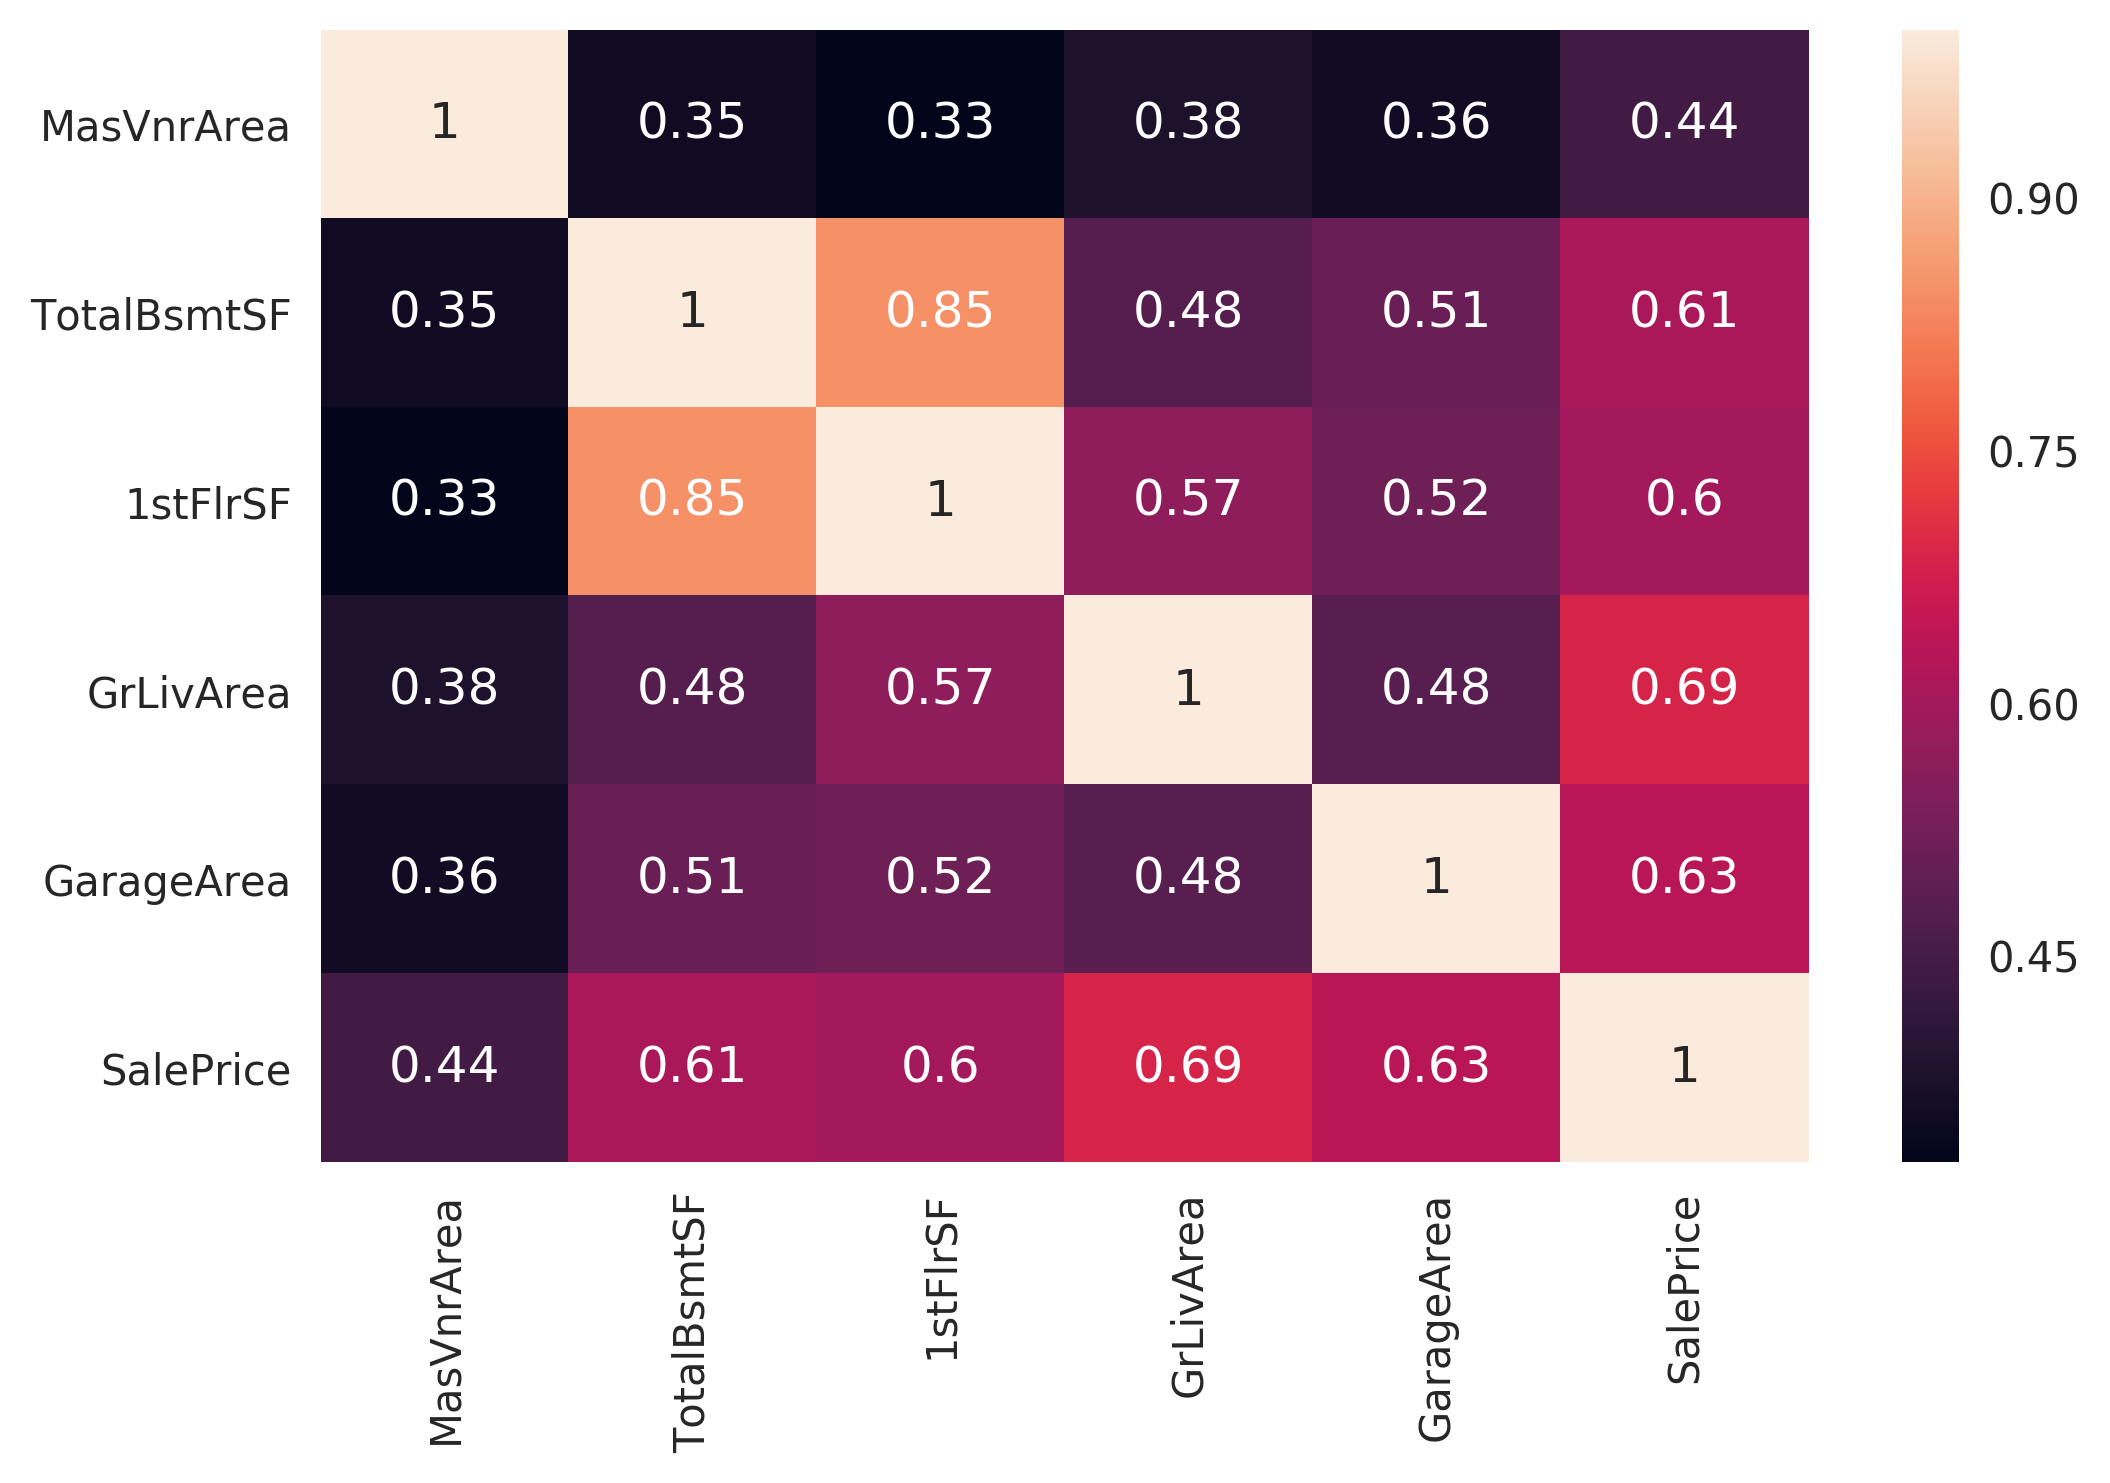

In [22]:
# 이미 구한 상관계수 df에서 쓸것만 뽑아옴 
corr_real_use = corr_real.loc[cols_real_use, cols_real_use]   
draw_cols_use = sns.heatmap(corr_real_use, annot = True)
plt.show(draw_cols_use)

In [23]:
# 필터 적용된 변수들의 df
df_real_use = df.loc[:, cols_real_use]
df_real_use.tail()

MasVnrArea  TotalBsmtSF  1stFlrSF  GrLivArea  GarageArea  SalePrice
Id                                                                       
1451         0.0          896       896       1792           0     136000
1452       194.0         1573      1578       1578         840     287090
1454         0.0         1140      1140       1140           0      84500
1455         0.0         1221      1221       1221         400     185000
1459         0.0         1078      1078       1078         240     142125

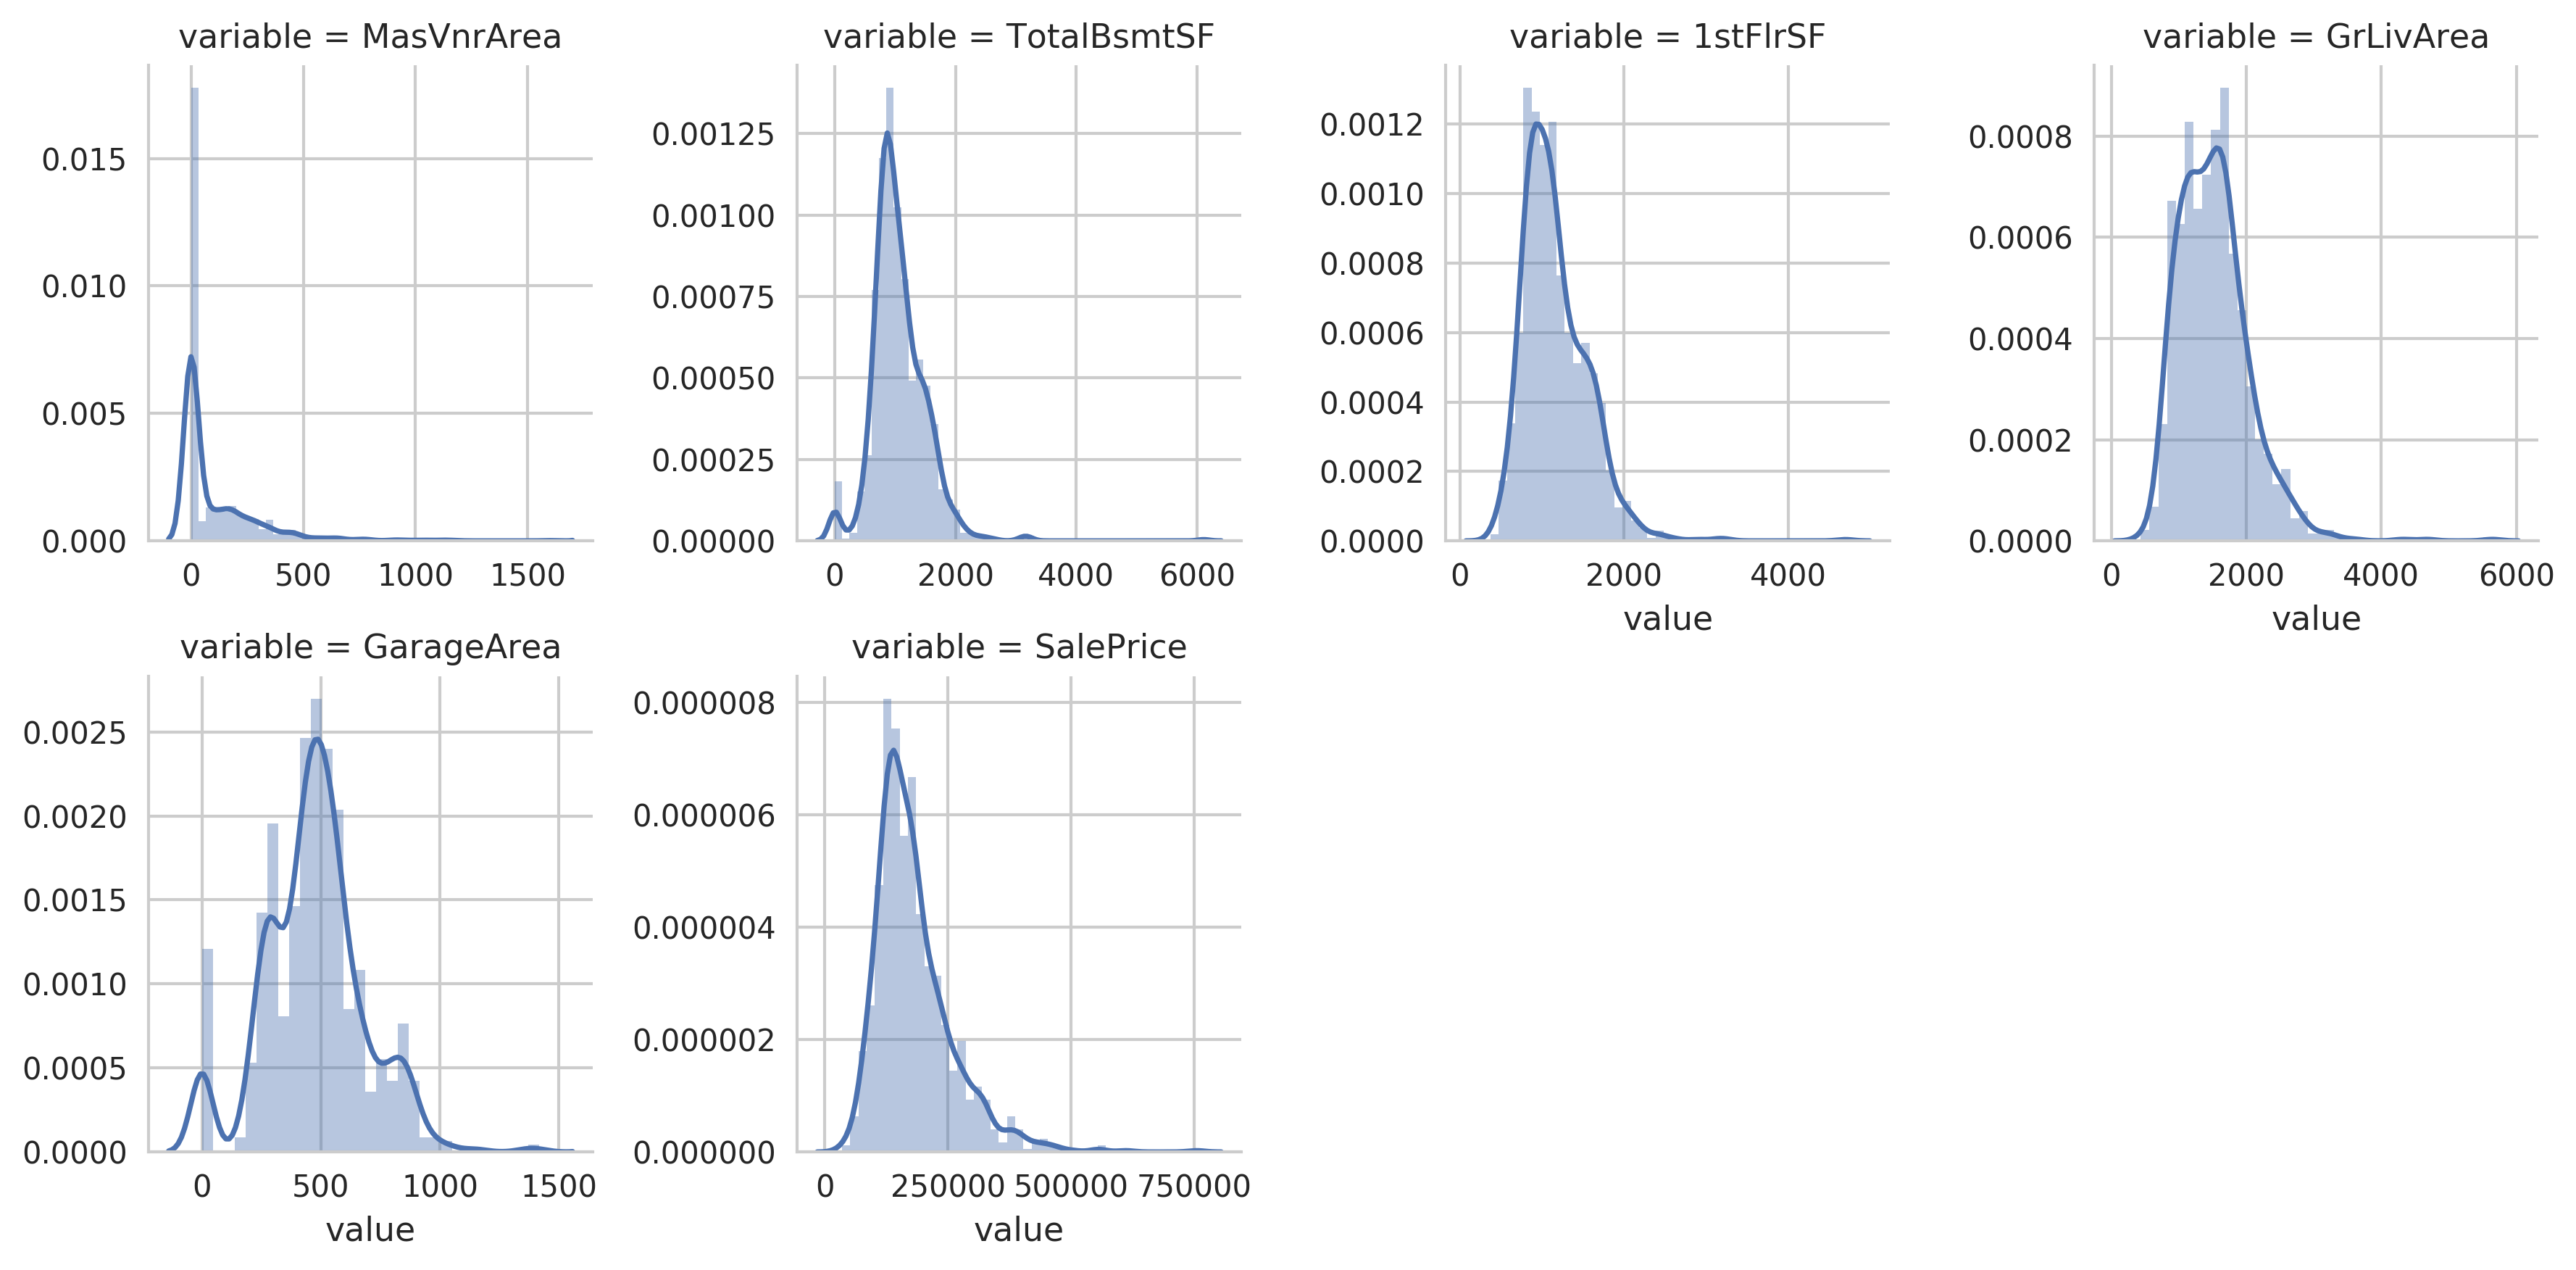

In [24]:
f = pd.melt(df, value_vars=df_real_use)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

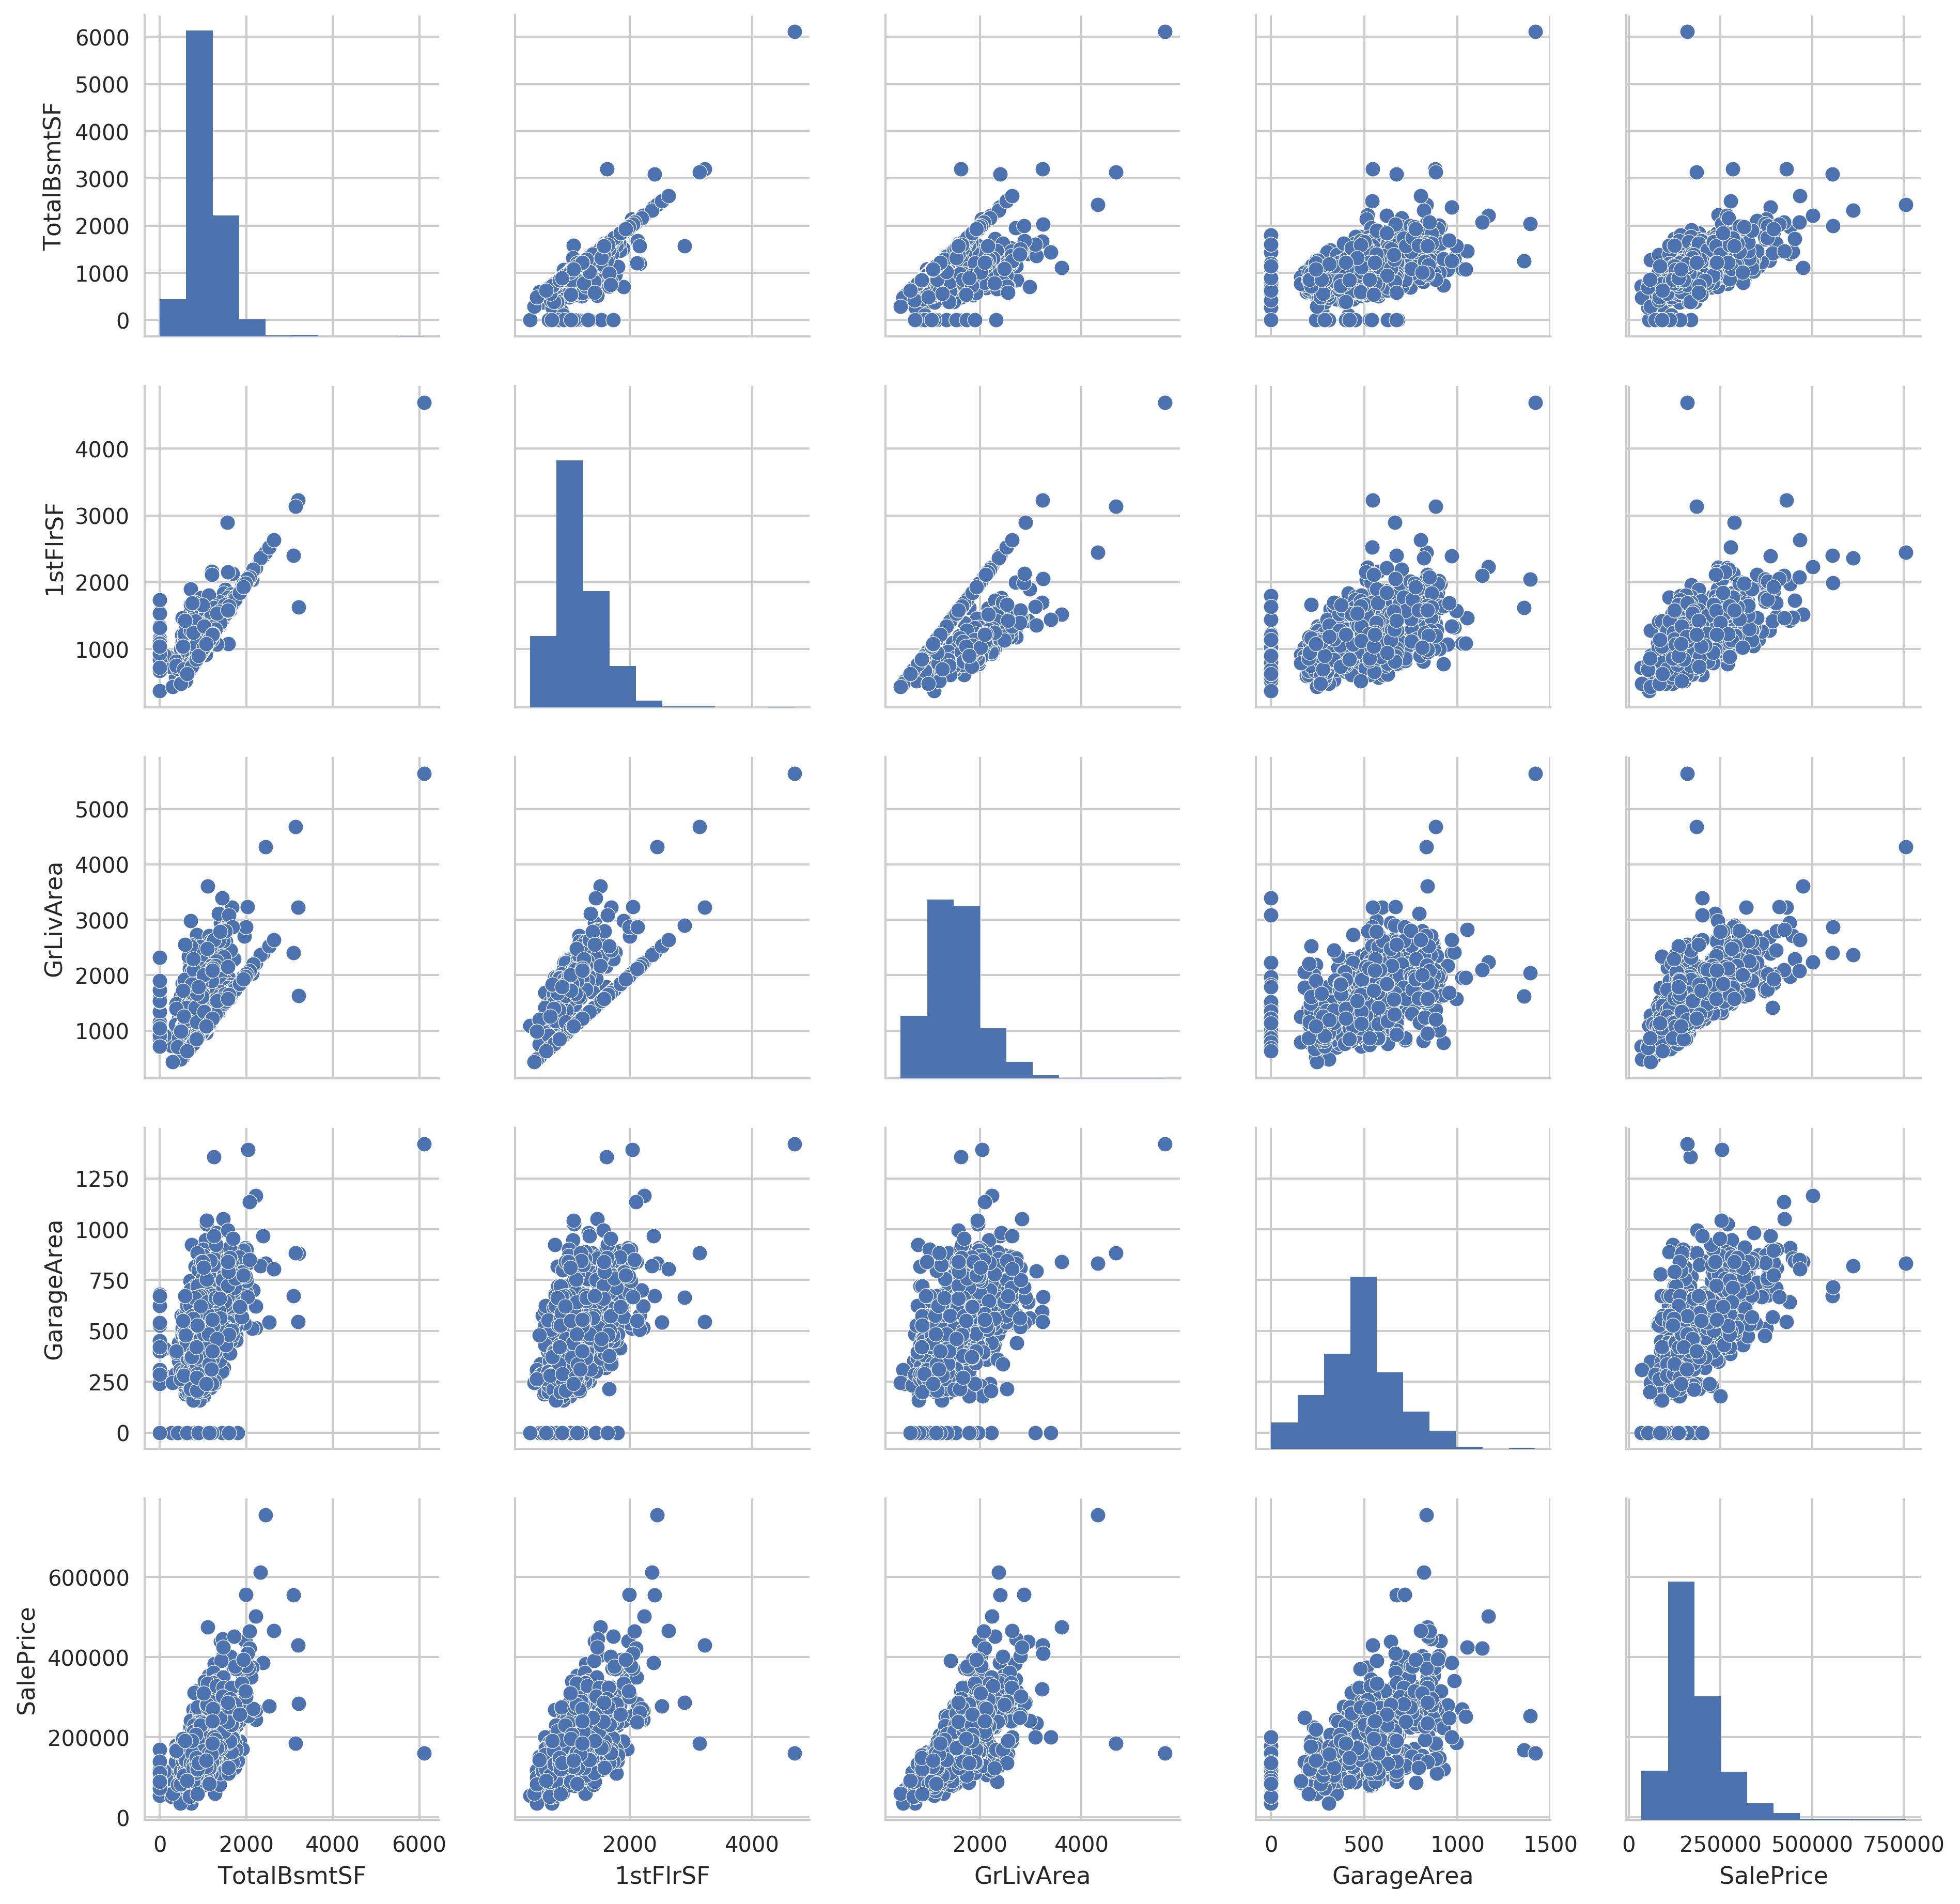

In [25]:
# 산점도 그려야하는데 못그리고 있음
temp = df_real_use.drop('MasVnrArea',axis = 1)
sns.pairplot(temp)
plt.show()

In [26]:
cols_cat = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
            'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd', 
            'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
            'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','KitchenQual', 
            'TotRmsAbvGrd', 'Functional', "Fireplaces", "FireplaceQu", "GarageCars", "GarageType", "GarageYrBlt", "GarageFinish", 
            "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature", "MoSold", "YrSold", "SaleType", "SaleCondition"]

In [27]:
dfX_cat = pd.DataFrame(df, columns = cols_cat)
dfX_cat.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
Id                                                                              
1           60       RL   Pave   NaN      Reg         Lvl    AllPub    Inside   
2           20       RL   Pave   NaN      Reg         Lvl    AllPub       FR2   
3           60       RL   Pave   NaN      IR1         Lvl    AllPub    Inside   
4           70       RL   Pave   NaN      IR1         Lvl    AllPub    Corner   
5           60       RL   Pave   NaN      IR1         Lvl    AllPub       FR2   

   LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
Id                                                                    
1        Gtl      CollgCr       Norm       Norm     1Fam     2Story   
2        Gtl      Veenker      Feedr       Norm     1Fam     1Story   
3        Gtl      CollgCr       Norm       Norm     1Fam     2Story   
4        Gtl      Crawfor       Norm       Norm     1Fam     2Story   
5        Gtl      NoRidge       Norm       Norm     1Fam     2Story   

    OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
Id                                                                         
1             7            5       2003          2003     Gable  CompShg   
2             6            8       1976          1976     Gable  CompShg   
3             7            5       2001          2002     Gable  CompShg   
4             7            5       1915          1970     Gable  CompShg   
5             8            5       2000          2000     Gable  CompShg   

   Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
Id                                                                              
1      VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
2      MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
3      VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
4      Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
5      VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

   BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
Id                                                                     
1        TA           No          GLQ          Unf    GasA        Ex   
2        TA           Gd          ALQ          Unf    GasA        Ex   
3        TA           Mn          GLQ          Unf    GasA        Ex   
4        Gd           No          ALQ          Unf    GasA        Gd   
5        TA           Av          GLQ          Unf    GasA        Ex   

   CentralAir Electrical  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
Id                                                                         
1           Y      SBrkr             1             0         2         1   
2           Y      SBrkr             0             1         2         0   
3           Y      SBrkr             1             0         2         1   
4           Y      SBrkr             1             0         1         0   
5           Y      SBrkr             1             0         2         1   

    BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
Id                                                                    
1              3             1          Gd             8        Typ   
2              3             1          TA             6        Typ   
3              3             1          Gd             6        Typ   
4              3             1          Gd             7        Typ   
5              4             1          Gd             9        Typ   

    Fireplaces FireplaceQu  GarageCars GarageType  GarageYrBlt GarageFinish  \
Id                                                                            
1            0         NaN           2     Attchd       2003.0          RFn   
2            1          TA           2     Attchd       1976.0  

In [28]:
df_real_cat = dfX_cat.select_dtypes(include=[np.number])
cols_real_cat = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd','BsmtFullBath', 'BsmtHalfBath', 
                 'FullBath', 'HalfBath', 'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
                 'GarageYrBlt', 'MoSold', 'YrSold']

df_real_cat.head()

MSSubClass  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                  
1           60            7            5       2003          2003   
2           20            6            8       1976          1976   
3           60            7            5       2001          2002   
4           70            7            5       1915          1970   
5           60            8            5       2000          2000   

    BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                 
1              1             0         2         1             3   
2              0             1         2         0             3   
3              1             0         2         1             3   
4              1             0         1         0             3   
5              1             0         2         1             4   

    KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageYrBlt  MoSold  \
Id                                                                            
1              1             8           0           2       2003.0       2   
2              1             6           1           2       1976.0       5   
3              1             6           1           2       2001.0       9   
4              1             7           1           3       1998.0       2   
5              1             9           1           3       2000.0      12   

    YrSold  
Id          
1     2008  
2     2007  
3     2008  
4     2006  
5     2008

In [29]:
df_real_cat.keys()

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageYrBlt', 'MoSold', 'YrSold'],
      dtype='object')

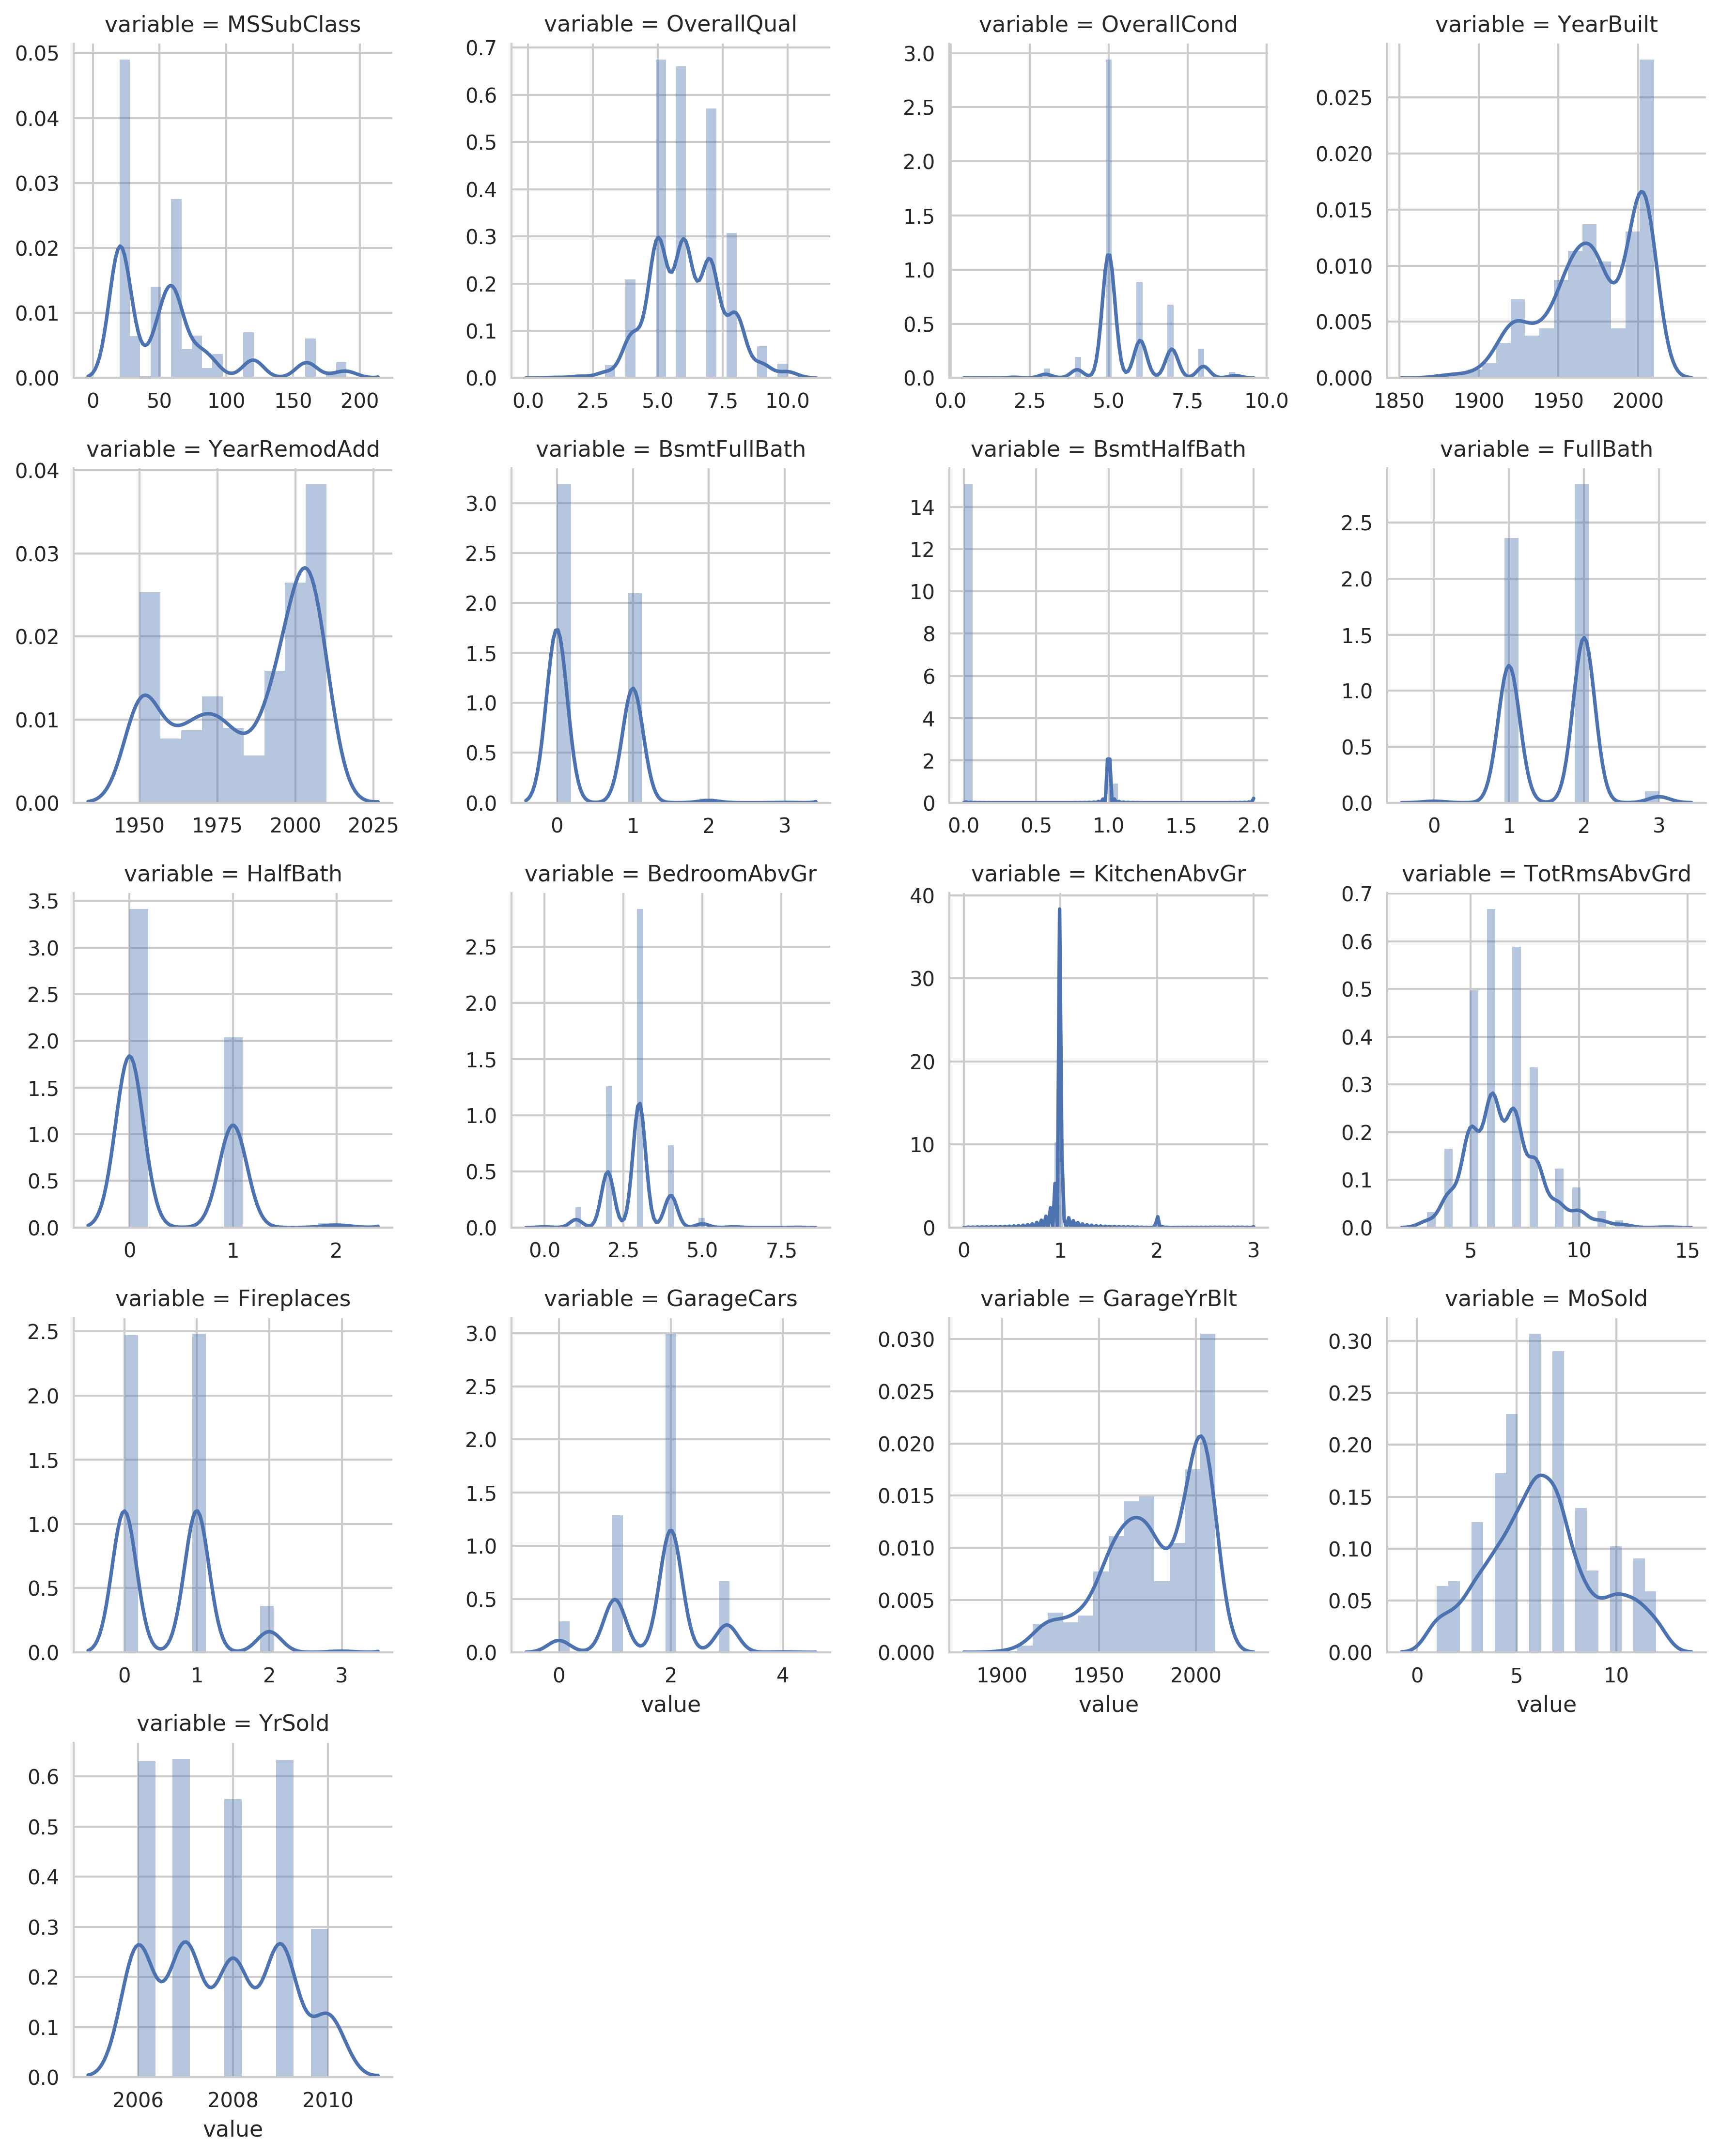

In [30]:
# 분포를 그래프로 시각화
f = pd.melt(df_real_cat)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [31]:
df_real_cat_sale = pd.concat([df_real_cat, dfy], axis=1)
df_real_cat_sale.tail()

MSSubClass  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                    
1451          90            5            5       1974          1974   
1452          20            8            5       2008          2009   
1454          20            5            5       2006          2006   
1455          20            7            5       2004          2005   
1459          20            5            6       1950          1996   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                   
1451             0             0         2         2             4   
1452             0             0         2         0             3   
1454             0             0         1         0             3   
1455             1             0         2         0             2   
1459             1             0         1         0             2   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageYrBlt  MoSold  \
Id                                                                              
1451             2             8           0           0          NaN       9   
1452             1             7           1           3       2008.0       5   
1454             1             6           0           0          NaN       7   
1455             1             6           0           2       2004.0      10   
1459             1             5           0           1       1950.0       4   

      YrSold  SalePrice  
Id                       
1451    2009     136000  
1452    2009     287090  
1454    2006      84500  
1455    2009     185000  
1459    2010     142125

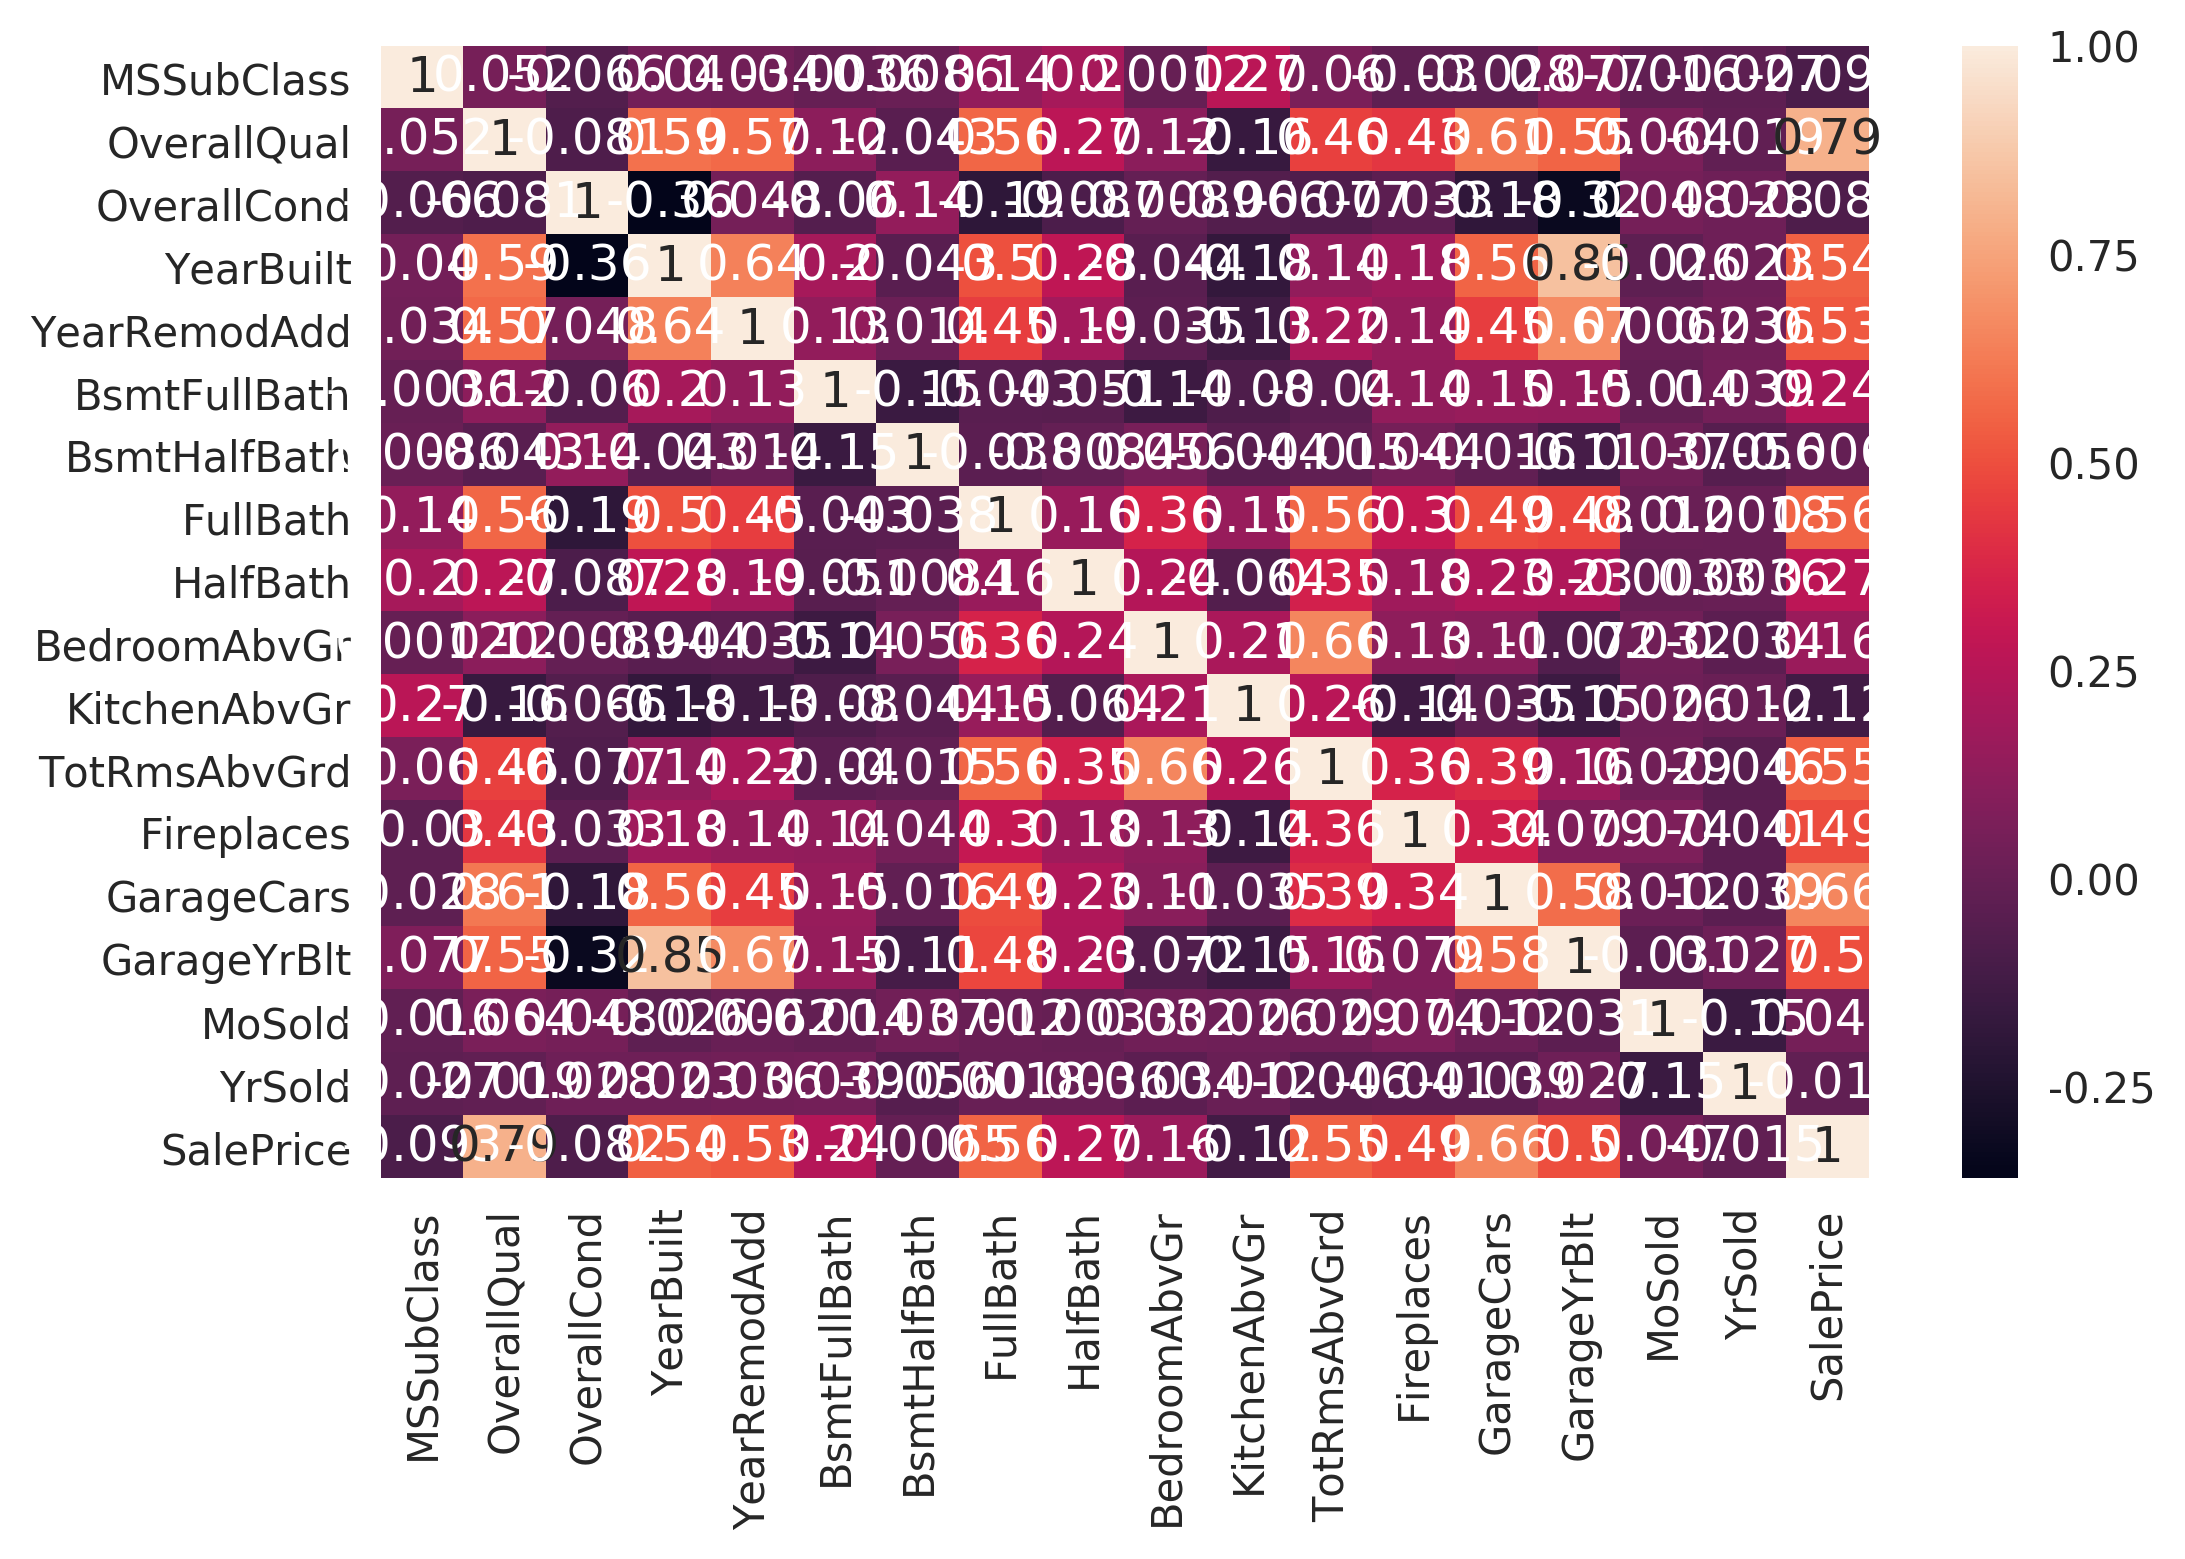

In [32]:
df_real_cat_corr = df_real_cat_sale.corr()
draw = sns.heatmap(df_real_cat_corr, annot = True)
plt.show(draw)

In [33]:
# SalePrice 와의 상관계수만 따로 모음
df_real_cat_corr.SalePrice

MSSubClass     -0.092854
OverallQual     0.793883
OverallCond    -0.081510
YearBuilt       0.544651
YearRemodAdd    0.527009
BsmtFullBath    0.244673
BsmtHalfBath   -0.006512
FullBath        0.558027
HalfBath        0.267535
BedroomAbvGr    0.162079
KitchenAbvGr   -0.121669
TotRmsAbvGrd    0.546666
Fireplaces      0.494997
GarageCars      0.657427
GarageYrBlt     0.497936
MoSold          0.047261
YrSold         -0.015135
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [34]:
# 필터 0.4 이상 -0.4 이하인것
corr_real_cat_fillter = (df_real_cat_corr.SalePrice > 0.4) | (df_real_cat_corr.SalePrice < -0.4)
# 상관계수가 0.4이상 -0.4 이하인 변수들
corr_real_cat_use_var = df_real_cat_corr.loc[corr_real_cat_fillter, corr_real_cat_fillter]

# 사용할 변수 리스트
cols_real_cat_use = list(corr_real_cat_use_var.keys())
# cols_real_use.remove('SalePrice')
# cols_real_use
cols_real_cat_use

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageYrBlt',
 'SalePrice']

In [35]:
# corr_real_cat_use = df_cat_real_corr.loc[cols_real_cat_use, cols_real_cat_use]   
# draw_cols_use = sns.heatmap(corr_real_cat_use, annot = True)
# plt.show(draw_cols_use)

In [36]:
# 필터 적용된 변수들의 df
df_real_cat_use = df.loc[:, cols_real_cat_use]
df_real_cat_use.tail()

OverallQual  YearBuilt  YearRemodAdd  FullBath  TotRmsAbvGrd  \
Id                                                                   
1451            5       1974          1974         2             8   
1452            8       2008          2009         2             7   
1454            5       2006          2006         1             6   
1455            7       2004          2005         2             6   
1459            5       1950          1996         1             5   

      Fireplaces  GarageCars  GarageYrBlt  SalePrice  
Id                                                    
1451           0           0          NaN     136000  
1452           1           3       2008.0     287090  
1454           0           0          NaN      84500  
1455           0           2       2004.0     185000  
1459           0           1       1950.0     142125

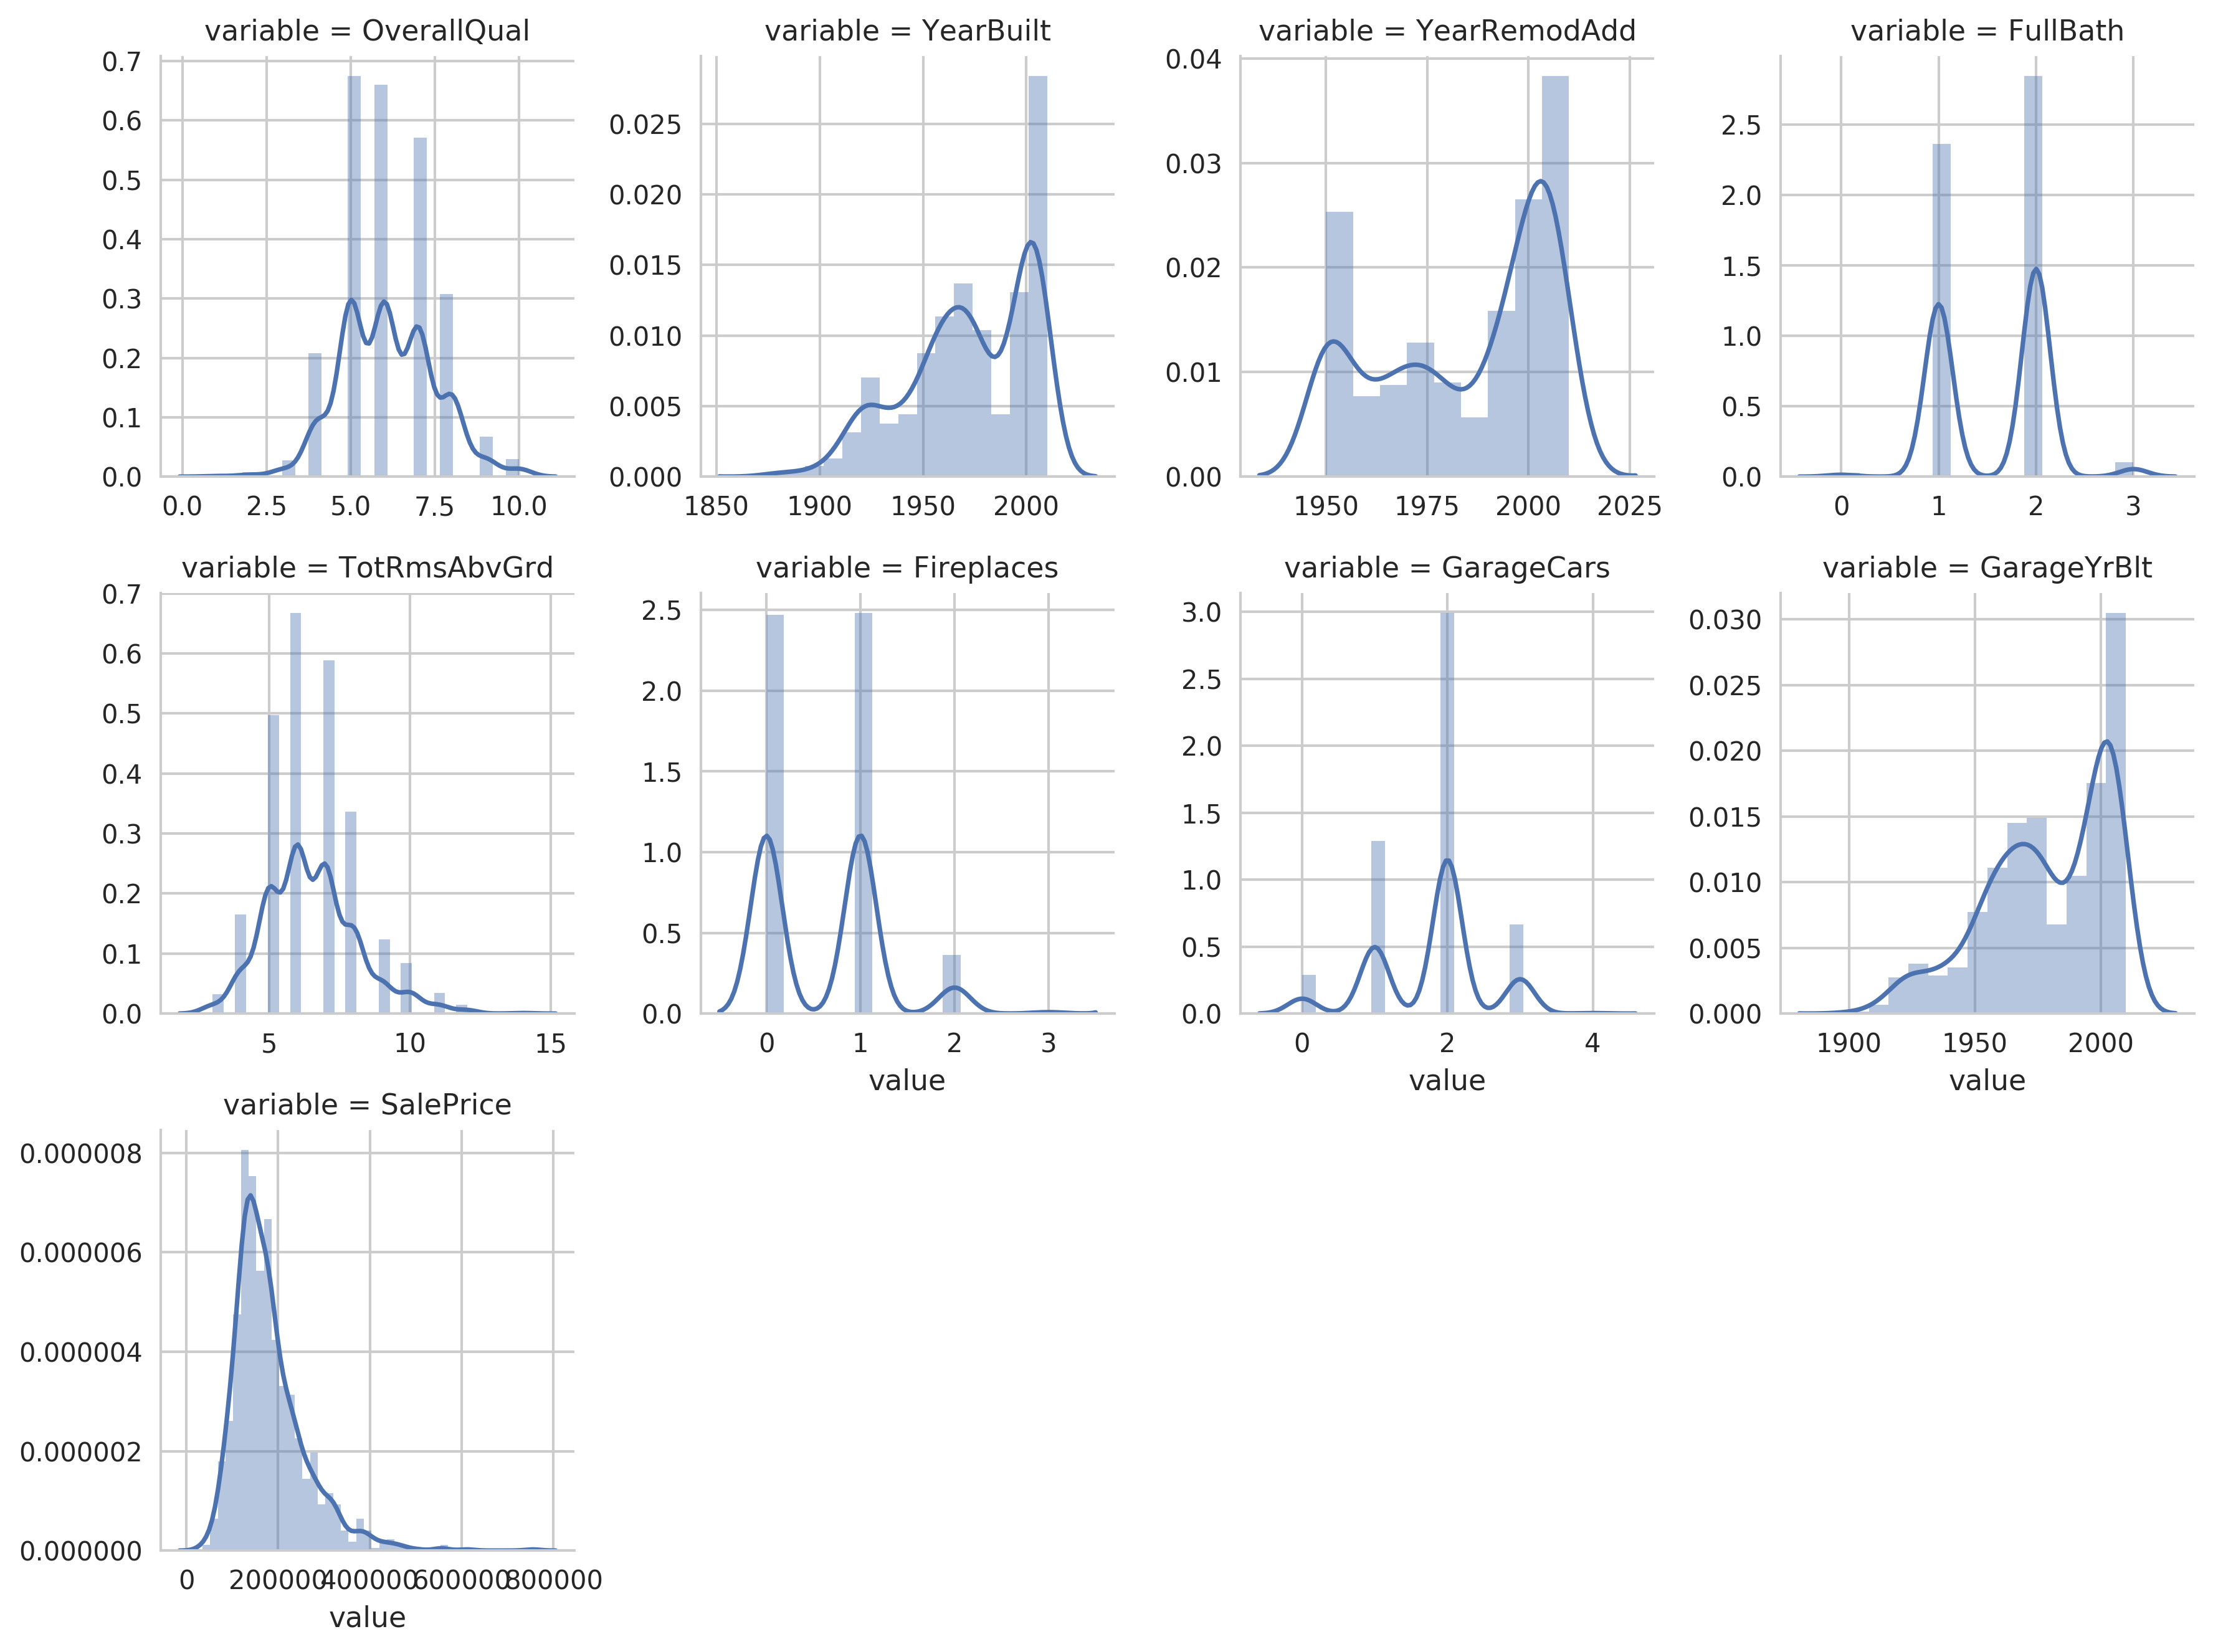

In [37]:
f = pd.melt(df_real_cat_use)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [38]:
cols_real_cat_use

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageYrBlt',
 'SalePrice']

In [39]:
cols_real_use

['MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageArea',
 'SalePrice']

## 양적변수 분석결과

#### 상관계수 결과


** 선택**
* LotFrontage    :  0.341220 배제 - 선택 (ols) ( 2차 필요)
* OverallQual    : 0.793883 (확실)  
* YearRemodAdd   : 0.527009 (확실)
* MasVnrArea : 0.45  선택 ( 나중에 2차 필요)
* TotalBsmtSF    : 0.613042 
* 1stFlrSF       : 0.602311 
* GrLivArea      : 0.686952 
* FullBath       : 0.558027 
* TotRmsAbvGrd   : 0.546666 
* Fireplaces     : 0.494997 
* GarageYrBlt    : 0.497936 
* GarageCars     : 0.657427 
* GarageArea     : 0.634201 

**배제**
* LotArea        :  0.244547 
* OverallCond    : -0.081510 
* BsmtFinSF1     :  0.393596 
* BsmtFinSF2     : -0.000854 
* BsmtUnfSF      :  0.206161 
* YearBuilt      : 0.544651 선택 - 배제 (ols)(확실)
* 1stFlrSF       :  0.602311 
* 2ndFlrSF       :  0.285219 
* LowQualFinSF   : -0.024921 
* BsmtFullBath   :  0.244673 
* BsmtHalfBath   : -0.006512 
* HalfBath       :  0.267535 
* BedroomAbvGr   :  0.162079 
* KitchenAbvGr   : -0.121669 
* WoodDeckSF     :  0.315122 
* OpenPorchSF    :  0.338569 
* EnclosedPorch  : -0.119878 
* 3SsnPorch      :  0.045000 
* ScreenPorch    :  0.099935 
* PoolArea       :  0.017794 
* MiscVal        : -0.022613 
* MoSold         :  0.047261 
* YrSold         : -0.015135 

**선택? 배제?**
* MasVnrArea : 0.45   

### 문제제기

 ##### LotFrontage
* LotFrontage 의 가격-상관계수는 0.34임. 하지만, 자료자체에 0 값이 많아서 왜곡이 발생하였을 가능성 존재함. 
* 이를 해결하기 위해 0이 포함된 행을 제거하고, 다시 상관관계를 구해서 실제로 무의미한 변수인지 확인하는 작업이 필요할 듯.
* 평균값을 대입하기로 함

##### YearBuilt 와 YearRemodAdd 
* 개념상으로 YearRemodAdd는 리모델링을 하지 않았을 경우는 YearBuilt의 값을 쓰기 때문에 YearBuilt의 내용을 포함한 더 업데이트된 자료라고 보여짐. 
* 그런데 오히려 상관계수는 0.01 더 낮음. 
* 이를 해결하기 위해 YearBuilt 와 YearRemodAdd를 병합할지, 아니면 양쪽 중 하나만 쓸지, 아니면 조작없이 둘 다 쓸지 결정할 필요 있음.
* YearRemodAdd 의 상관계수가 0.01 더 낮은 이유에 대해서 고찰 필요할 듯.

##### MasVnrArea
* Pairplot 이 안그려짐. Error 이유는 맥스값이 민값보다 낮다고 함.
* 정확한 원인은 모르겠지만 Value에 0 이 많아서 그렇지 않을까 추측함. 
* 이로 인한 왜곡가능성의 존재? 상관도도 0.45 임. 버릴까?

#### TotalBsmtSF : 지하실의 총 평방 피트
 - 해당 변수의 값은 아래 변수들의 합과 정확히 일치함
 - BsmtFinSF1 : 지하실 완성 구역의 평방 피트 / BsmtFinSF2 : 완료된 두번째 구역의 평방 피트 / BsmtUnfSF : 미완성된 지하실의 평방 피트
 - TotalBsmtSF 를 구성하는 3개의 변수들은 배제 가능하다고 생각됨
  
#### GrLivArea : 거주 면적 평방피트 (지면)
 - 해당 변수의 값은 아래 변수들의 합과 정확히 일치함
 - 1stFlrSF : 1층 평방 피트 / 2ndFlrSF : 2층 평방 피트 / LowQualFinSF : 저품질로 마감된 평방 피트(모든 층)
 - GrLivArea 를 구성하는 3개의 변수들은 배제 가능하다고 생각됨

##### GarageYrBlt, GarageCars, GarageArea
* 3가지 변수모두 비슷한 의미의 변수 한가지 변수로 합칠수 있을것이라고 생각됨
* GarageArea와 GarageCars두 변수의 상관 관계가 0.88로 높음
* GarageArea가 GarageCars를 포함하는 변수라고 생각됨 
* 하지만  GarageCars의 상관 계수가 더 높음 둘중 어떤것을 쓸지 골라야함

##### WoodDeckSF 와 YOpenPorchSF
* 상관 계수가 애매하지만 두가지 변수 모두 평방 피트를 의미하는걸로 보아 합치면 더 의미있는 변수가 될것 같음
    * 두 변수의 상관계수가 너무 낮으므로 합칠수는 없음.

## 양적 변수 OLS

In [40]:
df_real_use1 = df_real_use.drop('SalePrice',axis = 1)
dfX1 = sm.add_constant(df_real_use1)

model = sm.OLS(dfy, dfX1, missing = 'drop')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     373.2
Date:                Thu, 19 Oct 2017   Prob (F-statistic):          8.96e-228
Time:                        18:53:46   Log-Likelihood:                -12530.
No. Observations:                1030   AIC:                         2.507e+04
Df Residuals:                    1024   BIC:                         2.510e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5618.1754   5228.035     -1.075      

In [41]:
model = sm.OLS(dfy, df_real_use1)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     3500.
Date:                Thu, 19 Oct 2017   Prob (F-statistic):               0.00
Time:                        18:53:46   Log-Likelihood:                -12531.
No. Observations:                1030   AIC:                         2.507e+04
Df Residuals:                    1025   BIC:                         2.510e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
MasVnrArea     48.0949      8.682      5.540      

In [42]:
df_real_use1 = df_real_use.drop('SalePrice',axis = 1)
df_real_use1 = df_real_use1.drop('1stFlrSF',axis = 1)
dfX1 = sm.add_constant(df_real_use1)

model = sm.OLS(dfy, dfX1, missing = 'drop')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     466.4
Date:                Thu, 19 Oct 2017   Prob (F-statistic):          5.61e-229
Time:                        18:53:46   Log-Likelihood:                -12530.
No. Observations:                1030   AIC:                         2.507e+04
Df Residuals:                    1025   BIC:                         2.510e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6905.9048   5005.168     -1.380      

In [43]:
model = sm.OLS(dfy, df_real_use1)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     4373.
Date:                Thu, 19 Oct 2017   Prob (F-statistic):               0.00
Time:                        18:53:46   Log-Likelihood:                -12531.
No. Observations:                1030   AIC:                         2.507e+04
Df Residuals:                    1026   BIC:                         2.509e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
MasVnrArea     49.4529      8.611      5.743      

# real_cat

In [44]:
df_real_cat_use1 = df_real_cat_use.drop('SalePrice',axis = 1)
dfX1 = sm.add_constant(df_real_cat_use1)

model = sm.OLS(dfy, dfX1, missing = 'drop')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     319.1
Date:                Thu, 19 Oct 2017   Prob (F-statistic):          8.33e-265
Time:                        18:53:46   Log-Likelihood:                -11704.
No. Observations:                 973   AIC:                         2.343e+04
Df Residuals:                     964   BIC:                         2.347e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.019e+06    1.8e+05     -5.657   

In [45]:
df_real_cat_use1 = df_real_cat_use.drop('SalePrice',axis = 1)
model = sm.OLS(dfy, df_real_cat_use1, missing = 'drop')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     2770.
Date:                Thu, 19 Oct 2017   Prob (F-statistic):               0.00
Time:                        18:53:46   Log-Likelihood:                -11720.
No. Observations:                 973   AIC:                         2.346e+04
Df Residuals:                     965   BIC:                         2.349e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual   2.978e+04   1417.248     21.010   

In [46]:
df_real_cat_use1 = df_real_cat_use.drop('SalePrice',axis = 1)
df_real_cat_use1 = df_real_cat_use1.drop('FullBath',axis = 1)
dfX1 = sm.add_constant(df_real_cat_use1)

model = sm.OLS(dfy, dfX1, missing = 'drop')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     363.7
Date:                Thu, 19 Oct 2017   Prob (F-statistic):          1.65e-265
Time:                        18:53:46   Log-Likelihood:                -11705.
No. Observations:                 973   AIC:                         2.343e+04
Df Residuals:                     965   BIC:                         2.347e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.349e+05   1.73e+05     -5.404   

In [47]:
df_real_cat_use1 = df_real_cat_use.drop('SalePrice',axis = 1)
df_real_cat_use1 = df_real_cat_use1.drop('FullBath',axis = 1)
model = sm.OLS(dfy, df_real_cat_use1, missing = 'drop')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     3169.
Date:                Thu, 19 Oct 2017   Prob (F-statistic):               0.00
Time:                        18:53:47   Log-Likelihood:                -11720.
No. Observations:                 973   AIC:                         2.345e+04
Df Residuals:                     966   BIC:                         2.349e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual   2.975e+04   1375.519     21.632   

# 질적 변수

### 질적 변수간의 상관관계도와 산점도

## 질적 변수 OLS

In [48]:
cols_cat = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
            'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd', 
            'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
            'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','KitchenQual', 
            'TotRmsAbvGrd', 'Functional', "Fireplaces", "FireplaceQu", "GarageCars", "GarageType", "GarageYrBlt", "GarageFinish", 
            "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature", "MoSold", "YrSold", "SaleType", "SaleCondition"]

In [49]:
df_cat = dfX_cat.select_dtypes(include=[np.object])
print(df_cat.keys())
print(len(df_cat.keys()))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
43


In [50]:
cols_cats = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 
             'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 
             'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
             'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 'FireplaceQu', 
             'GarageType', 'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature','SaleType', 
             'SaleCondition']


df_cats = pd.concat([df_cat, dfy], axis=1)

In [51]:
a = "SalePrice ~ " + "C(" + ") + C(".join(cattt) + ")" 

NameError: name 'cattt' is not defined

In [ ]:
cat_rsquared = {}
for cat in cols_cats:
    a = "SalePrice ~ C(" + cat + ") + 0"
    model = sm.OLS.from_formula(a , df_cats)
    result = model.fit()
    print(result.summary(), "\n\n")
#     print(cat ,':', result.rsquared)
    cat_rsquared[cat] = result.rsquared

In [ ]:
for cat in cols_cats:
    if cat_rsquared[cat] > 0.4:
        print(cat ,':', cat_rsquared[cat])

In [ ]:
for cat in cols_cats:
    if cat_rsquared[cat] < 0.1:
        print(cat ,':', cat_rsquared[cat])